<img src="images/openfood.png" alt="https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21">

L'agence **"Santé publique France"** a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.



**Les données**

Extrait de l'appel à projets :

Le jeu de données **Open Food Fact** est disponible sur le site officiel https://world.openfoodfacts.org/. Les variables sont définies à cette adresse https://world.openfoodfacts.org/data/data-fields.txt

Les champs sont séparés en quatre sections :

* Les informations générales sur la fiche du produit : nom, date de modification, etc.
* Un ensemble de tags : catégorie du produit, localisation, origine, etc.
* Les ingrédients composant les produits et leurs additifs éventuels.
* Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

**Votre mission **

Après avoir lu l’appel à projets, voici les différentes étapes que vous avez identifiées :

1) Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir. Automatiser ces traitements pour éviter de répéter ces opérations.
(**Le programme doit fonctionner si la base de données est légèrement modifiée (ajout d’entrées, par exemple).**)

2) Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.
(**L’appel à projets spécifie que l’analyse doit être simple à comprendre pour un public néophyte. Soyez donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.**)

3) Élaborer une idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

## Documents 

* Graphique : https://www.psiweb.org/docs/default-source/2018-psi-conference-posters/48-julie-jones.pdf
* Missingno : https://github.com/ResidentMario/missingno

## Cours

* Décrivez et nettoyez votre jeu de données : https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees

* Réalisez une analyse exploratoire de données : https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data_nutriscore.csv",
                    sep='\t', low_memory=False)

In [3]:
df.sample(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
1935458,8697439064196,http://world-en.openfoodfacts.org/product/8697...,kiliweb,1515654259,2018-01-11T07:04:19Z,1515654269,2018-01-11T07:04:29Z,Natural snack,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1326808,5011417566671,http://world-en.openfoodfacts.org/product/5011...,swipe-studio,1609074449,2020-12-27T13:07:29Z,1609074485,2020-12-27T13:08:05Z,"Dettol, All In One Spray",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1251079,4250072802651,http://world-en.openfoodfacts.org/product/4250...,date-limite-app,1568982252,2019-09-20T12:24:12Z,1569011424,2019-09-20T20:30:24Z,Eiweissbrot,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279174,00893306400520001362,http://world-en.openfoodfacts.org/product/0089...,kiliweb,1583666569,2020-03-08T11:22:49Z,1612128205,2021-01-31T21:23:25Z,Burguer vegetariana,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1898672,8437014851052,http://world-en.openfoodfacts.org/product/8437...,kiliweb,1573234817,2019-11-08T17:40:17Z,1577385151,2019-12-26T18:32:31Z,Longaniza Abras,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print ("Le dataset compte {} lignes et {} colonnes".format(df.shape[0], df.shape[1]))

Le dataset compte 2033614 lignes et 187 colonnes


                                            ####################Nettoyage du DataFrame######################

In [5]:
df['fiber_100g'].dtypes

dtype('float64')

In [6]:
df['fiber_100g'].sample(5)

263894     NaN
1181588    3.0
519795     NaN
647501     NaN
1263471    NaN
Name: fiber_100g, dtype: float64

In [7]:
((df['fiber_100g'].isnull().sum() / df['fiber_100g'].shape[0])*100)

75.16072371649683

In [8]:
def valeur_null(df, tx_threshold=0):
  null_rate = ((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False).reset_index()
  null_rate.columns = ['Columns','Taux_de_Null']
  high_null_rate = null_rate[null_rate.Taux_de_Null >= tx_threshold]
  return high_null_rate

In [9]:
valeur_null_rate = valeur_null(df, 100)
valeur_null_rate
#Colonnes avec 100% de Taux de valeurs null

,Columns,Taux_de_Null
0,-montanic-acid_100g,100.0
1,-linoleic-acid_100g,100.0
2,-eicosapentaenoic-acid_100g,100.0
3,-alpha-linolenic-acid_100g,100.0
4,-melissic-acid_100g,100.0
5,-cerotic-acid_100g,100.0
6,-lignoceric-acid_100g,100.0
7,-behenic-acid_100g,100.0
8,cities,100.0
9,-arachidic-acid_100g,100.0


In [10]:
fill_columns = valeur_null(df, 0)
fill_columns["Taux_de_Null"] = 100-fill_columns["Taux_de_Null"]
fill_columns = fill_columns.sort_values("Taux_de_Null", ascending=False) 
fill_columns


,Columns,Taux_de_Null
186,code,100.0
178,created_datetime,100.0
185,url,100.0
184,last_modified_datetime,100.0
183,states_tags,100.0
...,...,...
26,-maltose_100g,0.0
25,-maltodextrins_100g,0.0
24,-nervonic-acid_100g,0.0
23,-arachidonic-acid_100g,0.0


In [11]:
#Seuil suppression en pourcentage de valeurs null 
sup_threshold = 25
#Liste des colonnes à conserver
features_to_conserve = list(fill_columns.loc[fill_columns['Taux_de_Null']>=sup_threshold, 'Columns'].values)
features_to_conserve.append('fiber_100g')
#Liste des colonnes supprimées
deleted_features = list(fill_columns.loc[fill_columns['Taux_de_Null']<sup_threshold, 'Columns'].values)
deleted_features.remove('fiber_100g')
#On crée un nouveau Dataset avec les colonnes conservées
df_clear = df[features_to_conserve].sort_values(["created_datetime","last_modified_datetime"], ascending=True)
#On conserve la colonne `fiber_100g` car on en aura besoin pour la suite
df_clear.sample(5)

,code,created_datetime,url,last_modified_datetime,states_tags,states,last_modified_t,states_en,created_t,creator,...,ingredients_text,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g,nutriscore_score,nutriscore_grade,image_ingredients_url,image_ingredients_small_url,nova_group,quantity,fiber_100g
1286190,4388844268326,2018-04-26T19:47:30Z,http://world-en.openfoodfacts.org/product/4388...,2021-03-15T08:52:17Z,"en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",1615798337,"To be completed,Nutrition facts completed,Ingr...",1524772050,kiliweb,...,"Kartoffeln 99%, Emulgator Mono - und Diglyceri...",0.0,-1.0,-1.0,a,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,4.0,345 g,NaN
1942509,8710908922268,2020-12-05T14:29:00Z,http://world-en.openfoodfacts.org/product/8710...,2021-02-02T21:10:47Z,"en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",1612300247,"To be completed,Nutrition facts completed,Ingr...",1607178540,kiliweb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566764,20291150,2018-11-05T12:36:25Z,http://world-en.openfoodfacts.org/product/2029...,2021-03-22T20:51:06Z,"en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",1616446266,"To be completed,Nutrition facts completed,Ingr...",1541421385,kiliweb,...,NaN,NaN,5.0,5.0,c,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,630g,NaN
731268,3041096898659,2019-09-30T13:56:24Z,http://world-en.openfoodfacts.org/product/3041...,2020-02-10T10:15:05Z,"en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",1581329705,"To be completed,Nutrition facts completed,Ingr...",1569851784,kiliweb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1499164,6925052198977,2019-10-01T10:42:39Z,http://world-en.openfoodfacts.org/product/6925...,2019-10-01T10:42:41Z,"en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",1569926561,"To be completed,Nutrition facts completed,Ingr...",1569926559,kiliweb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Fonction qui recherches les colonnes "nutriments" avec la mention "100g"
def search_nutriments(df_clear, suffix='_100g'):
  componant = []
  for col in df_clear.columns:
      if '_100g' in col: componant.append(col)
  df_nutriments = df_clear[componant]
  return df_nutriments

In [13]:
df_nutriments = search_nutriments(df_clear,'_100g')
df_nutriments.head()

,energy_100g,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,energy-kcal_100g,saturated-fat_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g,fiber_100g
1070582,1717.0,3.0,10.9,73.5,49.3,NaN,7.0,1.7000,0.68000,0.0,28.0,NaN
724222,1898.0,8.5,15.5,68.0,2.0,NaN,1.3,1.7526,0.70104,0.0,10.0,3.0
814768,1615.0,6.9,3.2,80.4,51.8,381.0,1.2,0.0900,0.03600,0.0,14.0,1.6
718534,1487.0,3.8,2.0,78.0,58.0,351.0,0.6,0.0900,0.03600,27.8,13.0,1.7
754458,2040.0,7.0,25.0,56.0,33.0,NaN,14.0,0.3810,0.15240,0.0,19.0,5.5


In [14]:
df_nutriments.shape

(2033614, 12)

In [15]:
print("Il y a {} colonnes avec la mention '_100g'".format(df_nutriments.shape[1]))

Il y a 12 colonnes avec la mention '_100g'


In [16]:
df_clear = df_clear[df_nutriments.notnull().any(axis=1)]
df_clear.shape
#Supression des lignes "nutriments" vide 

(1716542, 49)

In [17]:
df_clear.isna().sum()

code                                                           0
created_datetime                                               0
url                                                            0
last_modified_datetime                                         0
states_tags                                                    0
states                                                         0
last_modified_t                                                0
states_en                                                      0
created_t                                                      0
creator                                                        2
pnns_groups_2                                                  0
pnns_groups_1                                                  1
countries                                                   3649
countries_en                                                3652
countries_tags                                              3652
product_name             

In [18]:
df_clear.columns

Index(['code', 'created_datetime', 'url', 'last_modified_datetime',
       'states_tags', 'states', 'last_modified_t', 'states_en', 'created_t',
       'creator', 'pnns_groups_2', 'pnns_groups_1', 'countries',
       'countries_en', 'countries_tags', 'product_name', 'energy_100g',
       'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'energy-kcal_100g', 'image_small_url', 'image_url',
       'saturated-fat_100g', 'salt_100g', 'sodium_100g', 'image_nutrition_url',
       'image_nutrition_small_url', 'brands', 'brands_tags', 'categories',
       'main_category_en', 'main_category', 'categories_en', 'categories_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_from_palm_oil_n', 'additives_n', 'ingredients_text',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'nutrition-score-fr_100g', 'nutriscore_score', 'nutriscore_grade',
       'image_ingredients_url', 'image_ingredients_small_url', 'nova_group',
       'quant

<AxesSubplot:>

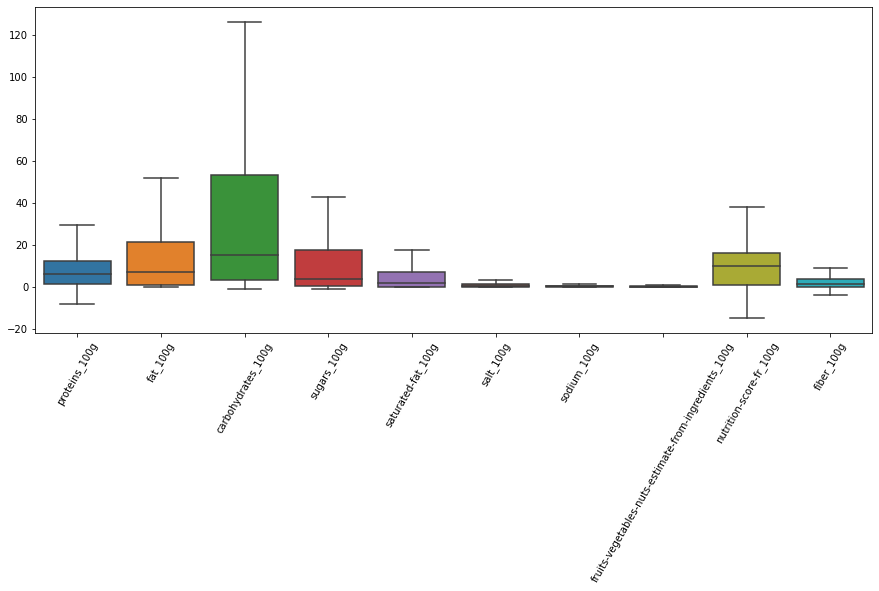

In [19]:
df_nutriments_untill_energy = df_nutriments.drop(['energy_100g', 'energy-kcal_100g'], axis=1)

plt.figure(figsize=[15, 6])
boxplot = sns.boxplot(data=df_nutriments_untill_energy, showfliers=False)
plt.xticks(rotation=60)
boxplot

array([[<AxesSubplot:title={'center':'energy_100g'}>,
        <AxesSubplot:title={'center':'proteins_100g'}>,
        <AxesSubplot:title={'center':'fat_100g'}>],
       [<AxesSubplot:title={'center':'carbohydrates_100g'}>,
        <AxesSubplot:title={'center':'sugars_100g'}>,
        <AxesSubplot:title={'center':'energy-kcal_100g'}>],
       [<AxesSubplot:title={'center':'saturated-fat_100g'}>,
        <AxesSubplot:title={'center':'salt_100g'}>,
        <AxesSubplot:title={'center':'sodium_100g'}>],
       [<AxesSubplot:title={'center':'fruits-vegetables-nuts-estimate-from-ingredients_100g'}>,
        <AxesSubplot:title={'center':'nutrition-score-fr_100g'}>,
        <AxesSubplot:title={'center':'fiber_100g'}>]], dtype=object)

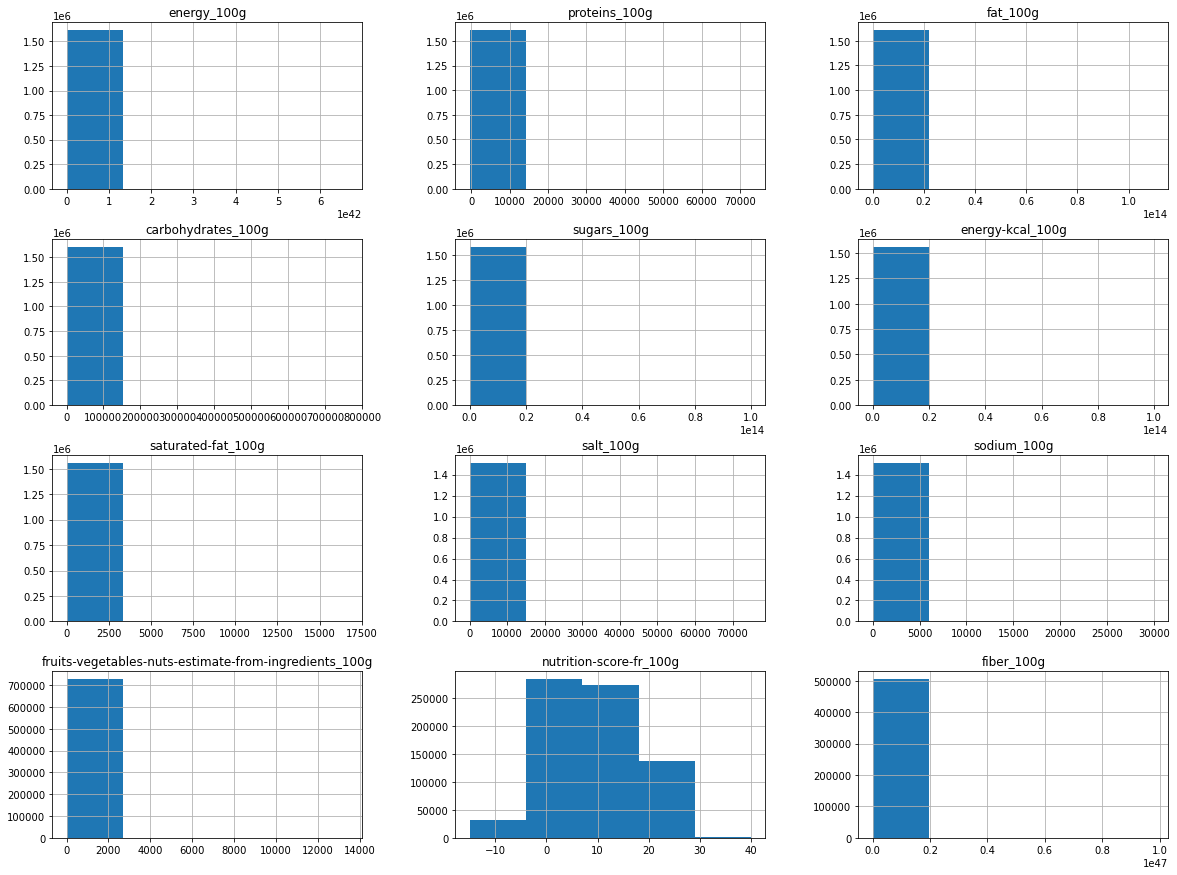

In [20]:
hist = df_nutriments.hist(bins=5, figsize=(20,15))
hist

                ######################Colonnes et lignes vides ou peu complétés nettoyées, on passe au doublons####################

In [21]:
print("Les doublons présent dans le DataFrame sont au nombres de {}".format(df_clear.duplicated().sum()))
#On regarde le nombre de doublons qui sont au nombre de 3

Les doublons présent dans le DataFrame sont au nombres de 3


In [22]:
#On supprime les doublons en fonction du code
df_clear.drop_duplicates(subset ="code", keep = 'last', inplace=True)

In [23]:
df_clear.duplicated().sum()
#Plus de doublons 

0

In [24]:
df_clear.nunique()

code                                                     1716530
created_datetime                                         1470750
url                                                      1716530
last_modified_datetime                                   1335296
states_tags                                                 4310
states                                                      4310
last_modified_t                                          1335296
states_en                                                   4310
created_t                                                1470750
creator                                                    12251
pnns_groups_2                                                 41
pnns_groups_1                                                 12
countries                                                  10325
countries_en                                                4149
countries_tags                                              4149
product_name             

In [25]:
df_clear['brands'].nunique()

156440

In [26]:
#On regarde le nombre de valeurs unique dans les colonnes "product_name" et "brands"
df_clear[(df_clear["product_name"].isnull()==False) 
& (df_clear["brands"].isnull()==False)].groupby(by=["product_name","brands"])["code"].nunique().sort_values(ascending=False)

product_name        brands                 
Burger vegetariana  Bonarea                    255
Filet de poulet     La Nouvelle Agriculture    212
Burger vegana       Bonarea                    179
Filets de poulet    La Nouvelle Agriculture    128
Queso semicurado    Entrepinares               116
                                              ... 
Fruttolo Misto GR.  Nestlé                       1
Fruttolosi          Coop                         1
Fruttosio           Consilia                     1
                    Crai                         1
🤬                   🤬                            1
Name: code, Length: 843252, dtype: int64

In [27]:
new_a = df_clear['product_name'] == "filet de poulet"
new_a.sum()

14

In [28]:
df_clear = df_clear[(df_clear["product_name"]!="🤬") & (df_clear["brands"]!="🤬")]
#Suppression de la ligne avec les émoticônes

In [29]:
# Suppression des doublons sur marque et produit en conservant les valeurs nulles
df_clear = df_clear[(~df_clear.duplicated(["product_name","brands"],keep="last")) | ((df_clear['product_name'].isnull()) & (df_clear['brands'].isnull()))]

In [30]:
#On regarde si la ligne et les doublons on bien été supprimés
df_clear[(df_clear["product_name"].isnull()==False) 
& (df_clear["brands"].isnull()==False)].groupby(by=["product_name","brands"])["code"].nunique().sort_values(ascending=False)

product_name                               brands         
 &gt;@H8=A:0O                              плюс               1
Petite bite                                Leader Price       1
Petite Tender With Teriyaki Seasoning      Ava Company        1
Petite Tomme De Brebis                     Ets SCHOEPFER      1
Petite Tomme de Savoie Chocolat Artisanal  Savoie Chocolat    1
                                                             ..
Fromage                                    Délice             1
                                           E                  1
                                           ECE                1
                                           Edam               1
🐰 Lait du pays Alpin                       Milka              1
Name: code, Length: 843251, dtype: int64

In [31]:
poulet = df_clear['product_name'] == "filet de poulet" 
poulet.sum()
#Il y avait 212 "filet de poulet" avant réduction contre 6 après suppression

6

In [32]:
df_clear.shape

(1392301, 49)

                        ##########Fin du nettoyage du DataFrame : il nous reste 1 392 294 lignes pour 48 colonnes##########
                #################A présent nous allons nous attaquer au "colonnes redondantes" en "_en" ou "_tags"####################

In [33]:
category_columns = ['categories','categories_tags','categories_en']
df_clear[df_clear[category_columns].notnull().any(axis=1)][['product_name'] + category_columns].sample(5)

,product_name,categories,categories_tags,categories_en
1029193,Raclette cheese,"Dairies,Fermented foods,Fermented milk product...","en:dairies,en:fermented-foods,en:fermented-mil...","Dairies,Fermented foods,Fermented milk product..."
138949,Hot Sauce,"Groceries, Sauces, Hot sauces","en:groceries,en:sauces,en:hot-sauces","Groceries,Sauces,Hot sauces"
473272,Killer italian pasta sauce,"Groceries, Sauces, Tomato sauces, Puttanesca s...","en:groceries,en:sauces,en:tomato-sauces,fr:sau...","Groceries,Sauces,Tomato sauces,Puttanesca sauc..."
618527,Lachsseite,"Fisch und Meeresfrüchte, Fisch, Lachs","en:seafood,en:fishes,en:salmons","Seafood,Fishes,Salmons"
1098090,La Pom',"Aliments et boissons à base de végétaux, Alime...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo..."


Les colonnes sont bien redondantes si la colonne suffixée `_en` existe, alors on supprime toutes les autres colonnes identiques non suffixées ou contenant `_tags`.

In [34]:
df_clear.isna().sum()

code                                                          0
created_datetime                                              0
url                                                           0
last_modified_datetime                                        0
states_tags                                                   0
states                                                        0
last_modified_t                                               0
states_en                                                     0
created_t                                                     0
creator                                                       2
pnns_groups_2                                                 0
pnns_groups_1                                                 0
countries                                                  3234
countries_en                                               3237
countries_tags                                             3237
product_name                            

In [35]:
def search_redundant(df):
  redundant = []
  for col in df.columns:
      if '_tags' in col: redundant.append(col)
      if '_en' in col: redundant.append(col)
  df_redundant = df[redundant]
  return df_redundant

In [36]:
df_redundant = search_redundant(df_clear) 
df_redundant

,states_tags,states_en,countries_en,countries_tags,brands_tags,main_category_en,categories_en,categories_tags
1070582,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",France,en:france,carabreizh,Salted butter caramels,"Groceries,Snacks,Sweet snacks,Confectioneries,...","en:groceries,en:snacks,en:sweet-snacks,en:conf..."
724222,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",France,en:france,jacquet,Crackers,"Snacks,Salty snacks,Appetizers,Crackers","en:snacks,en:salty-snacks,en:appetizers,en:cra..."
814768,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",France,en:france,cora,Sponge fingers biscuit,"Snacks,Sweet snacks,Biscuits and cakes,Biscuit...","en:snacks,en:sweet-snacks,en:biscuits-and-cake..."
718534,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...","Belgium,Canada,France,Switzerland","en:belgium,en:canada,en:france,en:switzerland",lu,fr:Barquettes à la fraise,"Snacks,Sweet snacks,Biscuits and cakes,Biscuit...","en:snacks,en:sweet-snacks,en:biscuits-and-cake..."
754458,"en:to-be-checked,en:complete,en:nutrition-fact...","To be checked,Complete,Nutrition facts complet...",France,en:france,biocoop,Chocolate biscuits,"Snacks,Sweet snacks,Biscuits and cakes,Biscuit...","en:snacks,en:sweet-snacks,en:biscuits-and-cake..."
...,...,...,...,...,...,...,...,...
2009864,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",Australia,en:australia,NaN,NaN,NaN,NaN
1517430,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",Costa Rica,en:costa-rica,mccallum-s,NaN,NaN,NaN
1315235,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",United Kingdom,en:united-kingdom,NaN,NaN,NaN,NaN
1986021,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",United States,en:united-states,NaN,NaN,NaN,NaN


On a maintenant récupérer nos colonnes redondantes dans un dataframe nommé `df_redundant`, on constate qu'il sont au nombre de 8. Voyons maintenant comment les supprimé et ne garder que les colonnes avec le suffixe `_en` et supprimés les deux autres, celle sans suffixe et celle avec `_tags`.

In [37]:
def search_redundant_col(df):
  redundant_columns = []
  for col in df.columns:
    if "_en" in col:
      en = col.replace('_en','')
      tags = col.replace('_en','_tags')
      print("{} 'Sans suffixe' -> {} ; 'Suffixe _tags' -> {}".format(col, en in df.columns, tags in df.columns))
      if en in df.columns : 
        redundant_columns.append(en)
      if tags in df.columns : 
        redundant_columns.append(tags)
  
    if '_tags' in col:
      tags_2 = col.replace('_tags','')
      print("{} 'Suffixe _tags' -> {} ;".format(tags_2, tags_2 in df.columns))
      if tags_2 in df.columns :
        redundant_columns.append(col)

  return redundant_columns

In [38]:
df_clear.drop(search_redundant_col(df_clear), axis=1, inplace=True)

states 'Suffixe _tags' -> True ;
states_en 'Sans suffixe' -> True ; 'Suffixe _tags' -> True
countries_en 'Sans suffixe' -> True ; 'Suffixe _tags' -> True
countries 'Suffixe _tags' -> True ;
brands 'Suffixe _tags' -> True ;
main_category_en 'Sans suffixe' -> True ; 'Suffixe _tags' -> False
categories_en 'Sans suffixe' -> True ; 'Suffixe _tags' -> True
categories 'Suffixe _tags' -> True ;


In [39]:
df_clear.shape
#On a bien supprimé les 8 colonnes.

(1392301, 41)

In [40]:
#Vérifions que ce sont bien les colonnes avec le suffixe "_en" qui sont toujours dans notre dataframe
#On peux utiliser notre fonction `search_redundant` utilisé plus haut
search_redundant(df_clear)
#On voit bien qu'il ne reste que les 4 colonnes redondantes avec le suffix "_en"

,states_en,countries_en,main_category_en,categories_en
1070582,"To be completed,Nutrition facts completed,Ingr...",France,Salted butter caramels,"Groceries,Snacks,Sweet snacks,Confectioneries,..."
724222,"To be completed,Nutrition facts completed,Ingr...",France,Crackers,"Snacks,Salty snacks,Appetizers,Crackers"
814768,"To be completed,Nutrition facts completed,Ingr...",France,Sponge fingers biscuit,"Snacks,Sweet snacks,Biscuits and cakes,Biscuit..."
718534,"To be completed,Nutrition facts completed,Ingr...","Belgium,Canada,France,Switzerland",fr:Barquettes à la fraise,"Snacks,Sweet snacks,Biscuits and cakes,Biscuit..."
754458,"To be checked,Complete,Nutrition facts complet...",France,Chocolate biscuits,"Snacks,Sweet snacks,Biscuits and cakes,Biscuit..."
...,...,...,...,...
2009864,"To be completed,Nutrition facts completed,Ingr...",Australia,NaN,NaN
1517430,"To be completed,Nutrition facts completed,Ingr...",Costa Rica,NaN,NaN
1315235,"To be completed,Nutrition facts completed,Ingr...",United Kingdom,NaN,NaN
1986021,"To be completed,Nutrition facts completed,Ingr...",United States,NaN,NaN


**On remarque que les dates aussi comportent une redondance**, avec les timestamp "_t" et les dates au format "yyyy-mm-dd", on doit les éliminer.

In [41]:
df_clear.columns

Index(['code', 'created_datetime', 'url', 'last_modified_datetime',
       'last_modified_t', 'states_en', 'created_t', 'creator', 'pnns_groups_2',
       'pnns_groups_1', 'countries_en', 'product_name', 'energy_100g',
       'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'energy-kcal_100g', 'image_small_url', 'image_url',
       'saturated-fat_100g', 'salt_100g', 'sodium_100g', 'image_nutrition_url',
       'image_nutrition_small_url', 'brands', 'main_category_en',
       'categories_en', 'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_from_palm_oil_n', 'additives_n', 'ingredients_text',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'nutrition-score-fr_100g', 'nutriscore_score', 'nutriscore_grade',
       'image_ingredients_url', 'image_ingredients_small_url', 'nova_group',
       'quantity', 'fiber_100g'],
      dtype='object')

In [42]:
df_clear['created_datetime'] = pd.to_datetime(df_clear['created_t'], unit='s')
df_clear['last_modified_datetime'] = pd.to_datetime(df_clear['last_modified_t'], unit='s')
df_clear = df_clear.drop(['created_t','last_modified_t'], axis=1)
df_clear.head() 

,code,created_datetime,url,last_modified_datetime,states_en,creator,pnns_groups_2,pnns_groups_1,countries_en,product_name,...,ingredients_text,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g,nutriscore_score,nutriscore_grade,image_ingredients_url,image_ingredients_small_url,nova_group,quantity,fiber_100g
1070582,3760029248001,2012-01-31 14:43:58,http://world-en.openfoodfacts.org/product/3760...,2021-10-27 05:28:48,"To be completed,Nutrition facts completed,Ingr...",stephane,Sweets,Sugary snacks,France,Caramels tendres au beurre salé au sel de Guér...,...,"_Lait_ reconstitué en poudre 26% de MG, sirop ...",0.0,28.0,28.0,e,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,4.0,100 g,NaN
724222,3029330062806,2012-02-09 10:34:56,http://world-en.openfoodfacts.org/product/3029...,2016-12-23 16:38:19,"To be completed,Nutrition facts completed,Ingr...",stephane,Appetizers,Salty snacks,France,Jacquet Les bouchées créatives à garnir,...,"Farine de blé, huile de tournesol, eau, sel, s...",0.0,10.0,10.0,c,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,3.0,54 g,3.0
814768,3257980112590,2012-02-11 14:51:07,http://world-en.openfoodfacts.org/product/3257...,2021-02-22 22:39:03,"To be completed,Nutrition facts completed,Ingr...",marianne,Biscuits and cakes,Sugary snacks,France,Boudoirs aux œufs frais,...,Sucre - farine de blé - œufs frais 25% - sirop...,0.0,14.0,14.0,d,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,4.0,175 g,1.6
718534,3017760038409,2012-02-11 15:07:23,http://world-en.openfoodfacts.org/product/3017...,2021-10-23 14:45:55,"To be completed,Nutrition facts completed,Ingr...",marianne,Biscuits and cakes,Sugary snacks,"Belgium,Canada,France,Switzerland",Lulu la barquette fraise,...,"Sirop de glucose-fructose, purée de fraises 27...",27.8,13.0,13.0,d,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,4.0,120 g,1.7
754458,3160181210524,2012-02-11 18:51:58,http://world-en.openfoodfacts.org/product/3160...,2019-08-23 19:57:37,"To be checked,Complete,Nutrition facts complet...",stephane,Biscuits and cakes,Sugary snacks,France,Cookies tout chocolat Biocoop,...,"pépites de chocolat* 30 % (pâte de cacao*, suc...",0.0,19.0,19.0,e,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,4.0,200 g,5.5


In [43]:
df_clear.shape

(1392301, 39)

Le dataframe contient a présent 1 392 294 lignes et 38 colonnes.

## Occupons nous a présent des pays

In [44]:
df_clear['countries_en']

1070582                               France
724222                                France
814768                                France
718534     Belgium,Canada,France,Switzerland
754458                                France
                         ...                
2009864                            Australia
1517430                           Costa Rica
1315235                       United Kingdom
1986021                        United States
2009723                            Australia
Name: countries_en, Length: 1392301, dtype: object

In [45]:
df_clear['countries_en'].value_counts()

France                                                     508944
United States                                              301203
Spain                                                      137230
Italy                                                       75346
Germany                                                     61095
                                                            ...  
South Korea,United States                                       1
Croatia,Czech Republic                                          1
Austria,France,Germany,Italy,Netherlands,United Kingdom         1
Central African Republic,Germany                                1
France,Germany,Switzerland,fr:dom-tom                           1
Name: countries_en, Length: 3747, dtype: int64

In [46]:
countries = df_clear.groupby('countries_en').nunique()
countries

,code,created_datetime,url,last_modified_datetime,states_en,creator,pnns_groups_2,pnns_groups_1,product_name,energy_100g,...,ingredients_text,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g,nutriscore_score,nutriscore_grade,image_ingredients_url,image_ingredients_small_url,nova_group,quantity,fiber_100g
countries_en,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,0,...,1,1,0,0,0,1,1,1,0,0
Afghanistan,2,2,2,2,1,1,1,1,2,0,...,2,1,0,0,0,2,2,0,0,0
"Afghanistan,Belgium,France",2,2,2,2,2,2,2,2,2,2,...,1,1,2,2,2,2,2,1,2,1
"Afghanistan,France",120,120,120,120,64,21,20,9,120,100,...,88,24,27,27,5,100,100,4,59,20
"Afghanistan,France,French Guiana",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Česko,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Ελλάδα,8,8,8,8,5,1,5,4,8,8,...,5,1,7,7,4,2,2,2,6,4
المانيا,1,1,1,1,1,1,1,1,0,0,...,1,1,0,0,0,1,1,0,1,0


On remarque que plusieurs pays sont regroupés dans la même variable, nous allons devoir effectuer un split du texte pour visualiser tout nos pays :

In [47]:
countries_two=pd.Series(", ".join(df_clear["countries_en"].dropna()).split(", "))
countries_two

0                                     France
1                                     France
2                                     France
3          Belgium,Canada,France,Switzerland
4                                     France
                         ...                
1389059                            Australia
1389060                           Costa Rica
1389061                       United Kingdom
1389062                        United States
1389063                            Australia
Length: 1389064, dtype: object

In [48]:
countries_two.value_counts()

France                                                     508944
United States                                              301203
Spain                                                      137230
Italy                                                       75346
Germany                                                     61095
                                                            ...  
South Korea,United States                                       1
Croatia,Czech Republic                                          1
Austria,France,Germany,Italy,Netherlands,United Kingdom         1
Central African Republic,Germany                                1
France,Germany,Switzerland,fr:dom-tom                           1
Length: 3747, dtype: int64

In [49]:
#Fonction qui va couper les différents pays dans la colonnes countries_en ainsi que dans les différentes lignes ou ils peuvent apparaître plusieurs fois
def split_words(df, column):
  list_words = set()
  for word in df[column].str.split(','):
    if isinstance(word, float):
      continue
    list_words = set().union(word, list_words)
  return list(list_words)

In [50]:
#Liste contenant tous les pays du dataframe (bons ou mauvais)
list_countries = split_words(df_clear, 'countries_en')
list_countries

['Peru',
 'Polynesie-francaise',
 'Peru-espanol',
 'Armenia',
 'Northern Mariana Islands',
 'Niederlande',
 'El-salvador-espanol',
 'Republic-of-macedonia',
 'Wales',
 'Madagascar',
 'Iran',
 'Botswana',
 'Venezuela-espanol',
 'Turkiye',
 'Korea-한국어',
 'fr:francia',
 'Egypt',
 'Brazil-portugues',
 'Espagne',
 'Lebanon-english',
 'Mongolia',
 'Canada',
 'Palau',
 'Mexico',
 'Pologne',
 'Czech-repblik',
 'es:santona',
 'Indian-subcontinent',
 'Dominican Republic',
 'Japan',
 'Francia-spain',
 'Middle-east',
 'Latvia-latviešu',
 'Curaçao',
 'Nigeria',
 'French Southern and Antarctic Lands',
 'France',
 'Belgique',
 'Caribbean Netherlands',
 'Malaysia-english',
 'Suiza',
 'Chile9',
 'Bulgaria-български',
 'es:espanha',
 'South Korea',
 'Switzerland-francais',
 'Chile-espanol',
 'Oman',
 'Chile',
 'Turkey',
 'Ukraine',
 'World',
 'Saint Kitts and Nevis',
 'Tajikistan',
 'Guatemala',
 'Romania',
 'fr:cemac',
 'Iraq',
 'Bahrain',
 'Algerie',
 'Bermuda',
 'East Germany',
 'Trinidad-tobago-engl

In [51]:
print("Nombre de pays du dataframe : {}".format(len(list_countries)))

Nombre de pays du dataframe : 523


Nous allons maintenant nettoyer les "mauvais" pays en les supprimants

Pour traîter ces pays j'ai télécharger une base de données de pays "cleaner" en anglais et comparer avec notre liste de pays et supprimer ceux qui ne matchent pas

In [52]:
df_countries = pd.read_csv("countries-en.csv", sep=",", header=None, index_col = 0).rename(columns={0:"index", 1:"country_id", 2:"country_code_2", 3:"country_code_3", 4:"country_fr", 5:"country_en"})
df_countries.head()

,country_id,country_code_2,country_code_3,country_fr,country_en
0,,,,,
1,4,AF,AFG,Afghanistan,Afghanistan
2,8,AL,ALB,Albanie,Albania
3,10,AQ,ATA,Antarctique,Antarctica
4,12,DZ,DZA,Algérie,Algeria
5,16,AS,ASM,Samoa Américaines,American Samoa


In [53]:
df_countries = pd.merge(pd.DataFrame(list_countries, columns=["countries_dataset"]),df_countries, how="left", 
         left_on="countries_dataset", right_on="country_en")
df_countries

,countries_dataset,country_id,country_code_2,country_code_3,country_fr,country_en
0,Peru,604.0,PE,PER,Pérou,Peru
1,Polynesie-francaise,NaN,NaN,NaN,NaN,NaN
2,Peru-espanol,NaN,NaN,NaN,NaN,NaN
3,Armenia,51.0,AM,ARM,Arménie,Armenia
4,Northern Mariana Islands,580.0,MP,MNP,Îles Mariannes du Nord,Northern Mariana Islands
...,...,...,...,...,...,...
518,Irland,NaN,NaN,NaN,NaN,NaN
519,Reino-unido,NaN,NaN,NaN,NaN,NaN
520,Galmudug,NaN,NaN,NaN,NaN,NaN
521,اليمن,NaN,NaN,NaN,NaN,NaN


In [54]:
false_country_list = list(df_countries[df_countries.isnull().sum(axis=1)>0].countries_dataset)
false_country_list[0:15]

['Polynesie-francaise',
 'Peru-espanol',
 'Niederlande',
 'El-salvador-espanol',
 'Republic-of-macedonia',
 'Wales',
 'Iran',
 'Venezuela-espanol',
 'Turkiye',
 'Korea-한국어',
 'fr:francia',
 'Brazil-portugues',
 'Espagne',
 'Lebanon-english',
 'Pologne']

On a maintenant la liste de nos pays "mauvais" nous allons les supprimer.

In [55]:
for index, countries in df_clear['countries_en'].str.split(',').items():
  if isinstance(countries, float):
    continue
  country_name = []
  found = False
  for country in countries:
    if country in false_country_list:
      found = True
    else:
      country_name.append(country)
  if found:
    df_clear.loc[index, 'countries_en'] = ','.join(country_name)

In [56]:
print("Nombre de pays restant : {}".format(len(split_words(df_clear, 'countries_en'))))

Nombre de pays restant : 193


In [57]:
df_clear['countries_en'].shape[0]

1392301

On s'occupe des valeurs nulls pour cette colonne

In [58]:
df_clear['countries_en'] = np.where((df_clear['countries_en'].isnull()==True), "unknown", np.where(df_clear['countries_en'] == "", "unknown", df_clear['countries_en']))

In [59]:
df_clear['countries_en'].isnull().sum()
#Plus de valeurs null

0

In [60]:
df_clear['countries_en']

1070582                               France
724222                                France
814768                                France
718534     Belgium,Canada,France,Switzerland
754458                                France
                         ...                
2009864                            Australia
1517430                           Costa Rica
1315235                       United Kingdom
1986021                        United States
2009723                            Australia
Name: countries_en, Length: 1392301, dtype: object

## On va maintenant regardez les catégories de produits

4 colonnes représentent la catégorisation des produits de différentes manières qui sont plus au moins précises. Ces colonnes sont `categories_en` , `main_category_en`, `pnns_groups_1` et `pnns_groups_2`. 

In [61]:
df_clear[['categories_en','pnns_groups_1','pnns_groups_2','main_category_en',]].sample(10)

,categories_en,pnns_groups_1,pnns_groups_2,main_category_en
889297,"Plant-based foods and beverages,Plant-based fo...",unknown,unknown,Chestnut spreads
1618886,NaN,unknown,unknown,NaN
1238854,NaN,unknown,unknown,NaN
1849953,NaN,unknown,unknown,NaN
986247,"Plant-based foods and beverages,Plant-based fo...",Cereals and potatoes,Cereals,Sesame seed husked
1656536,"Plant-based foods and beverages,Plant-based fo...",Fat and sauces,Fats,Vegetable oils
891536,"Snacks,Sweet snacks,Confectioneries,Nougats,Wh...",Sugary snacks,Sweets,White nougat
1910516,NaN,unknown,unknown,NaN
482395,"Snacks,Salty snacks,Appetizers,Chips and fries...",Salty snacks,Appetizers,Corn chips
1382919,NaN,unknown,unknown,NaN


Nous allons regardez le nombre total de catégories

In [62]:
categories = (split_words(df=df_clear, column='categories_en'))
print("Il y a {} catégories dans notre dataframe").format(len(categories))

KeyboardInterrupt: 

On remarque qu'il y a énormément de valeurs nulls ou manquantes, on va les remplacer.

In [63]:
df_clear['categories_en'] = np.where((df_clear['categories_en'].isnull()==True), "unknown", 
                                 np.where(df_clear['categories_en'] == "", "unknown", df_clear['categories_en']))
df_clear['main_category_en'] = np.where((df_clear['main_category_en'].isnull()==True), "unknown", 
                                 np.where(df_clear['main_category_en'] == "", "unknown", df_clear['main_category_en']))
df_clear['pnns_groups_1'] = np.where((df_clear['pnns_groups_1'].isnull()==True), "unknown", 
                                 np.where(df_clear['pnns_groups_1'] == "", "unknown", df_clear['pnns_groups_1']))
df_clear['pnns_groups_2'] = np.where((df_clear['pnns_groups_2'].isnull()==True), "unknown", 
                                 np.where(df_clear['pnns_groups_2'] == "", "unknown", df_clear['pnns_groups_2']))

In [64]:
df_clear[['categories_en','pnns_groups_1','pnns_groups_2','main_category_en',]].sample(10)

,categories_en,pnns_groups_1,pnns_groups_2,main_category_en
1688087,unknown,unknown,unknown,unknown
937418,unknown,unknown,unknown,unknown
1532149,unknown,unknown,unknown,unknown
626406,unknown,unknown,unknown,unknown
389214,unknown,unknown,unknown,unknown
1188320,unknown,unknown,unknown,unknown
131640,"Plant-based foods and beverages,Plant-based fo...",Cereals and potatoes,Cereals,Cereals and their products
175899,unknown,unknown,unknown,unknown
330839,"Meats,Poultries,Chickens,fr:Aiguillettes de po...",Fish Meat Eggs,Meat,fr:Aiguillettes de poulet
816695,"Beverages,Sweetened beverages",Beverages,Sweetened beverages,Sweetened beverages


In [65]:
df_clear[['categories_en','pnns_groups_1','pnns_groups_2','main_category_en',]].isnull().sum()
#Plus de valeurs nulls

categories_en       0
pnns_groups_1       0
pnns_groups_2       0
main_category_en    0
dtype: int64

In [66]:
df_clear.loc[924339]

code                                                                                         3413880042287
created_datetime                                                                       2019-12-02 11:17:02
url                                                      http://world-en.openfoodfacts.org/product/3413...
last_modified_datetime                                                                 2020-10-10 08:37:56
states_en                                                To be completed,Nutrition facts completed,Ingr...
creator                                                                                            kiliweb
pnns_groups_2                                                                                      unknown
pnns_groups_1                                                                                      unknown
countries_en                                                                                        France
product_name                         

In [ ]:
categories = split_words(df = df_clear, column = 'main_category_en')
print("{} catégories sont représentées dans le jeu de données.".format(len(categories)))

KeyboardInterrupt: 

In [ ]:
categories = split_words(df = df_clear, column = 'categories_en')
print("{} catégories sont représentées dans le jeu de données.".format(len(categories)))

KeyboardInterrupt: 

Passons à présent aux colonnes `pnns_groups_1` et `pnns_groups_2` qui nous apporteront des informations plus précises :

In [67]:
pnns_groups_1 = split_words(df = df_clear, column = 'pnns_groups_1')
pnns_groups_2 = split_words(df = df_clear, column = 'pnns_groups_2')
print("{} catégories sont représentées dans la variable pnns_group_1.".format(len(pnns_groups_1)))
print("{} catégories sont représentées dans la variable pnns_group_2.".format(len(pnns_groups_2)))

12 catégories sont représentées dans la variable pnns_group_1.
41 catégories sont représentées dans la variable pnns_group_2.


In [68]:
pnns_groups_1

['Fruits and vegetables',
 'Composite foods',
 'Fat and sauces',
 'Alcoholic beverages',
 'Sugary snacks',
 'Fish Meat Eggs',
 'sugary-snacks',
 'unknown',
 'Milk and dairy products',
 'Salty snacks',
 'Beverages',
 'Cereals and potatoes']

In [69]:
pnns_groups_2

['Salty and fatty products',
 'Milk and yogurt',
 'Processed meat',
 'Cereals',
 'Teas and herbal teas and coffees',
 'Vegetables',
 'Fish and seafood',
 'Offals',
 'Chocolate products',
 'Appetizers',
 'Eggs',
 'Plant-based milk substitutes',
 'Ice cream',
 'Meat',
 'Artificially sweetened beverages',
 'Bread',
 'Waters and flavored waters',
 'Sweets',
 'Fruit juices',
 'pastries',
 'Legumes',
 'Biscuits and cakes',
 'Fruits',
 'Sandwiches',
 'Fruit nectars',
 'Fats',
 'Unsweetened beverages',
 'Dried fruits',
 'Nuts',
 'Dressings and sauces',
 'Potatoes',
 'Dairy desserts',
 'Soups',
 'Cheese',
 'One-dish meals',
 'Alcoholic beverages',
 'Pizza pies and quiches',
 'Pastries',
 'Sweetened beverages',
 'Breakfast cereals',
 'unknown']

On voit ici que certaines catégories sont présentes plusieurs fois mais orthographiées différement :
- 'Sugary snacks' et 'sugary-snacks'
- ...

Nous allons donc corriger le problème en passant le texte en miniscule et en remplaçant les caractères spéciaux par un espace :

In [70]:
df_clear['pnns_groups_1'] = df_clear['pnns_groups_1'].str.lower().str.replace('-', ' ')
#On passe le texte en minuscule avec str.lower et on remplace les tirets par de simple espace avec str.replace

In [71]:
pnns_groups_1 = split_words(df = df_clear, column = 'pnns_groups_1')
print("Nous avons maintenant {} catégories dans la colonne 'pnns_groups_1' ".format(len(pnns_groups_1)))
print(pnns_groups_1)

Nous avons maintenant 11 catégories dans la colonne 'pnns_groups_1' 
['fish meat eggs', 'fat and sauces', 'alcoholic beverages', 'cereals and potatoes', 'sugary snacks', 'unknown', 'composite foods', 'milk and dairy products', 'fruits and vegetables', 'beverages', 'salty snacks']


On fais la même chose pour la colonne `pnns_group_2`

In [72]:
df_clear['pnns_groups_2'] = df_clear['pnns_groups_2'].str.lower().str.replace('-', ' ')
#On passe le texte en minuscule avec str.lower et on remplace les tirets par de simple espace avec str.replace

In [73]:
pnns_groups_2 = split_words(df = df_clear, column = 'pnns_groups_2')
print("Nous avons maintenant {} catégories dans la colonne 'pnns_groups_2' ".format(len(pnns_groups_2)))
print(pnns_groups_2)

Nous avons maintenant 40 catégories dans la colonne 'pnns_groups_2' 
['offals', 'vegetables', 'biscuits and cakes', 'appetizers', 'potatoes', 'sandwiches', 'processed meat', 'dairy desserts', 'nuts', 'soups', 'pastries', 'fruit nectars', 'alcoholic beverages', 'cheese', 'dried fruits', 'one dish meals', 'salty and fatty products', 'chocolate products', 'cereals', 'eggs', 'unsweetened beverages', 'dressings and sauces', 'ice cream', 'sweetened beverages', 'teas and herbal teas and coffees', 'pizza pies and quiches', 'fats', 'plant based milk substitutes', 'fruit juices', 'bread', 'meat', 'sweets', 'unknown', 'fish and seafood', 'artificially sweetened beverages', 'breakfast cereals', 'waters and flavored waters', 'fruits', 'milk and yogurt', 'legumes']


On a réduit 1 catégorie dans `pnns_group_1` et `pnns_group_2`.

In [74]:
print(df_clear.info)

<bound method DataFrame.info of                   code    created_datetime  \
1070582  3760029248001 2012-01-31 14:43:58   
724222   3029330062806 2012-02-09 10:34:56   
814768   3257980112590 2012-02-11 14:51:07   
718534   3017760038409 2012-02-11 15:07:23   
754458   3160181210524 2012-02-11 18:51:58   
...                ...                 ...   
2009864  9310174093731 2021-11-17 01:34:21   
1517430  7441136201993 2021-11-17 01:45:20   
1315235  5000232006905 2021-11-17 01:50:56   
1986021  8901123005960 2021-11-17 01:54:28   
2009723  9310155010948 2021-11-17 02:05:24   

                                                       url  \
1070582  http://world-en.openfoodfacts.org/product/3760...   
724222   http://world-en.openfoodfacts.org/product/3029...   
814768   http://world-en.openfoodfacts.org/product/3257...   
718534   http://world-en.openfoodfacts.org/product/3017...   
754458   http://world-en.openfoodfacts.org/product/3160...   
...                                        

## Outliers et valeurs nulls, abberrantes ou atypiques

Le jeu de données est nettoyé mais il reste encore un grand nombre de valeurs manquantes qu'il va falloir compléter mais également des valeurs abberantes, autrement dit outliers à identifier.

In [75]:
df_clear.describe()

,energy_100g,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,energy-kcal_100g,saturated-fat_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g,nutriscore_score,nova_group,fiber_100g
count,1.303390e+06,1.297831e+06,1.296655e+06,1.296416e+06,1.277173e+06,1.256579e+06,1.255010e+06,1.216028e+06,1.216025e+06,632157.000000,632157.000000,632157.000000,631820.000000,591509.000000,591505.000000,546100.000000,4.368450e+05
mean,5.114017e+36,8.491318e+00,8.483368e+07,2.992499e+01,7.829794e+07,8.657065e+07,5.003294e+00,2.416295e+00,9.665742e-01,0.071969,0.021539,1.995311,8.530126,9.095130,9.095058,3.435312,2.246397e+41
std,5.838474e+39,6.880144e+01,9.660074e+10,6.962308e+02,8.848612e+10,8.954479e+10,1.773537e+01,1.340902e+02,5.364383e+01,0.309943,0.147185,2.868344,38.016911,8.859172,8.859153,0.960449,1.484740e+44
min,0.000000e+00,-5.000000e+02,0.000000e+00,-5.000000e-01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000,1.000000,-2.000000e+01
25%,4.180000e+02,1.300000e+00,7.700000e-01,4.000000e+00,7.220000e-01,1.000000e+02,1.000000e-01,7.000000e-02,2.800000e-02,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000e+00
50%,1.079000e+03,5.880000e+00,6.800000e+00,1.700000e+01,3.800000e+00,2.600000e+02,1.790000e+00,5.475000e-01,2.190000e-01,0.000000,0.000000,1.000000,0.000000,10.000000,10.000000,4.000000,1.700000e+00
75%,1.674000e+03,1.200000e+01,2.100000e+01,5.400000e+01,1.900000e+01,4.000000e+02,6.900000e+00,1.340000e+00,5.360000e-01,0.000000,0.000000,3.000000,0.800000,16.000000,16.000000,4.000000,3.700000e+00
max,6.665559e+42,7.300000e+04,1.100000e+14,7.629390e+05,1.000000e+14,1.000000e+14,1.670000e+04,7.500000e+04,3.000000e+04,6.000000,3.000000,49.000000,13454.000000,40.000000,40.000000,4.000000,9.813275e+46


On remarque deja que les valeurs min et max de certaines colonnes comme la valeur énergétique contiennent des valeurs abberantes qui peuvent influer ou même fausser nos calculs.

In [76]:
df_clear[df_clear['energy_100g'] == df_clear['energy_100g'].max()]

,code,created_datetime,url,last_modified_datetime,states_en,creator,pnns_groups_2,pnns_groups_1,countries_en,product_name,...,ingredients_text,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g,nutriscore_score,nutriscore_grade,image_ingredients_url,image_ingredients_small_url,nova_group,quantity,fiber_100g
667864,2558888,2019-07-19 21:09:11,http://world-en.openfoodfacts.org/product/2558888,2019-07-19 21:11:47,"To be completed,Nutrition facts completed,Ingr...",openfoodfacts-contributors,unknown,unknown,Bulgaria,NaN,...,",,,?",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ici on a le produit qui possède la plus grande valeur energétique et on voit qu'il n'est quasiment pas complété. Il manque le nom du produit, les catégories et toutes les valeurs nutritionnelles pratiquement indispensables. Je vais donc **supprimer tous les produits qui n'ont ni nom, ni catégories** et qui ne pourront pas être clairement identifiés.

In [137]:
datas_cleaned = df_clear
datas_cleaned.shape

(1392301, 39)

In [138]:
datas_cleaned = df_clear[~((df_clear.product_name.isnull()) 
                        & ((df_clear.pnns_groups_1 == "unknown") 
                        | (df_clear.main_category_en == "unknown")))]

In [139]:
datas_cleaned.shape

(1384348, 39)

In [140]:
datas_cleaned

,code,created_datetime,url,last_modified_datetime,states_en,creator,pnns_groups_2,pnns_groups_1,countries_en,product_name,...,ingredients_text,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g,nutriscore_score,nutriscore_grade,image_ingredients_url,image_ingredients_small_url,nova_group,quantity,fiber_100g
1070582,3760029248001,2012-01-31 14:43:58,http://world-en.openfoodfacts.org/product/3760...,2021-10-27 05:28:48,"To be completed,Nutrition facts completed,Ingr...",stephane,sweets,sugary snacks,France,Caramels tendres au beurre salé au sel de Guér...,...,"_Lait_ reconstitué en poudre 26% de MG, sirop ...",0.0,28.0,28.0,e,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,4.0,100 g,NaN
724222,3029330062806,2012-02-09 10:34:56,http://world-en.openfoodfacts.org/product/3029...,2016-12-23 16:38:19,"To be completed,Nutrition facts completed,Ingr...",stephane,appetizers,salty snacks,France,Jacquet Les bouchées créatives à garnir,...,"Farine de blé, huile de tournesol, eau, sel, s...",0.0,10.0,10.0,c,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,3.0,54 g,3.0
814768,3257980112590,2012-02-11 14:51:07,http://world-en.openfoodfacts.org/product/3257...,2021-02-22 22:39:03,"To be completed,Nutrition facts completed,Ingr...",marianne,biscuits and cakes,sugary snacks,France,Boudoirs aux œufs frais,...,Sucre - farine de blé - œufs frais 25% - sirop...,0.0,14.0,14.0,d,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,4.0,175 g,1.6
718534,3017760038409,2012-02-11 15:07:23,http://world-en.openfoodfacts.org/product/3017...,2021-10-23 14:45:55,"To be completed,Nutrition facts completed,Ingr...",marianne,biscuits and cakes,sugary snacks,"Belgium,Canada,France,Switzerland",Lulu la barquette fraise,...,"Sirop de glucose-fructose, purée de fraises 27...",27.8,13.0,13.0,d,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,4.0,120 g,1.7
754458,3160181210524,2012-02-11 18:51:58,http://world-en.openfoodfacts.org/product/3160...,2019-08-23 19:57:37,"To be checked,Complete,Nutrition facts complet...",stephane,biscuits and cakes,sugary snacks,France,Cookies tout chocolat Biocoop,...,"pépites de chocolat* 30 % (pâte de cacao*, suc...",0.0,19.0,19.0,e,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,4.0,200 g,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009864,9310174093731,2021-11-17 01:34:21,http://world-en.openfoodfacts.org/product/9310...,2021-11-17 01:34:22,"To be completed,Nutrition facts completed,Ingr...",foodvisor,unknown,unknown,Australia,Beef and bacon pasta bake,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1517430,7441136201993,2021-11-17 01:45:20,http://world-en.openfoodfacts.org/product/7441...,2021-11-17 01:45:21,"To be completed,Nutrition facts completed,Ingr...",foodvisor,unknown,unknown,Costa Rica,Corn flakes hojuelas de maíz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1315235,5000232006905,2021-11-17 01:50:56,http://world-en.openfoodfacts.org/product/5000...,2021-11-17 01:50:58,"To be completed,Nutrition facts completed,Ingr...",kiliweb,unknown,unknown,United Kingdom,Soffritto passata,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1986021,8901123005960,2021-11-17 01:54:28,http://world-en.openfoodfacts.org/product/8901...,2021-11-17 01:54:29,"To be completed,Nutrition facts completed,Ingr...",kiliweb,unknown,unknown,United States,Lotte Choco Pie Cocoa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
datas_cleaned[((datas_cleaned.pnns_groups_1 == "unknown") & (datas_cleaned.main_category_en == "unknown") &
              (datas_cleaned.pnns_groups_2 == "unknown") & (datas_cleaned.categories_en == "unknown"))].shape[0]

675026

Il reste 675k produits qui n'ont aucune indication de catégories.

In [142]:
datas_cleaned.dtypes

code                                                             object
created_datetime                                         datetime64[ns]
url                                                              object
last_modified_datetime                                   datetime64[ns]
states_en                                                        object
creator                                                          object
pnns_groups_2                                                    object
pnns_groups_1                                                    object
countries_en                                                     object
product_name                                                     object
energy_100g                                                     float64
proteins_100g                                                   float64
fat_100g                                                        float64
carbohydrates_100g                                              

In [143]:
def search_numeric(datas_cleaned):
    for value in datas_cleaned['nova_group']:
        if value < 0 :
            return value
search_numeric(datas_cleaned)

In [144]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_numeric = datas_cleaned.select_dtypes(include=numerics)
df_numeric

,energy_100g,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,energy-kcal_100g,saturated-fat_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g,nutriscore_score,nova_group,fiber_100g
1070582,1717.0,3.000000,10.900000,73.500000,49.300000,NaN,7.000000,1.7000,0.68000,0.0,0.0,2.0,0.0,28.0,28.0,4.0,NaN
724222,1898.0,8.500000,15.500000,68.000000,2.000000,NaN,1.300000,1.7526,0.70104,0.0,0.0,1.0,0.0,10.0,10.0,3.0,3.0
814768,1615.0,6.900000,3.200000,80.400000,51.800000,381.000000,1.200000,0.0900,0.03600,0.0,0.0,2.0,0.0,14.0,14.0,4.0,1.6
718534,1487.0,3.800000,2.000000,78.000000,58.000000,351.000000,0.600000,0.0900,0.03600,0.0,0.0,2.0,27.8,13.0,13.0,4.0,1.7
754458,2040.0,7.000000,25.000000,56.000000,33.000000,NaN,14.000000,0.3810,0.15240,0.0,1.0,2.0,0.0,19.0,19.0,4.0,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009864,556.0,6.000000,4.500000,16.000000,2.100000,133.000000,2.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1517430,1534.0,6.666667,NaN,86.666667,3.333333,366.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1315235,167.0,2.400000,1.200000,3.900000,3.600000,40.000000,0.200000,0.8000,0.32000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1986021,1868.0,3.571429,18.928571,64.285714,33.928571,446.428571,12.142857,0.7500,0.30000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


16 colonnes sur nos 38 restantes contiennent des valeurs numériques.

In [145]:
negative_value = (df_numeric<0).sum()
negative_value

energy_100g                                                  0
proteins_100g                                                2
fat_100g                                                     0
carbohydrates_100g                                           1
sugars_100g                                                  3
energy-kcal_100g                                             0
saturated-fat_100g                                           0
salt_100g                                                    0
sodium_100g                                                  0
ingredients_that_may_be_from_palm_oil_n                      0
ingredients_from_palm_oil_n                                  0
additives_n                                                  0
fruits-vegetables-nuts-estimate-from-ingredients_100g        0
nutrition-score-fr_100g                                  92831
nutriscore_score                                         92831
nova_group                                             

Juste au dessus on a le nombre de valeurs négatives par colonnes c'est à dire >0. On remarque que celle qui en contiennent principalement le plus sont les 2 colonnes des nutriscore.

In [146]:
datas_cleaned.isna().sum()

code                                                          0
created_datetime                                              0
url                                                           0
last_modified_datetime                                        0
states_en                                                     0
creator                                                       2
pnns_groups_2                                                 0
pnns_groups_1                                                 0
countries_en                                                  0
product_name                                               1981
energy_100g                                               85328
proteins_100g                                             90687
fat_100g                                                  91894
carbohydrates_100g                                        92176
sugars_100g                                              111146
energy-kcal_100g                        

<AxesSubplot:>

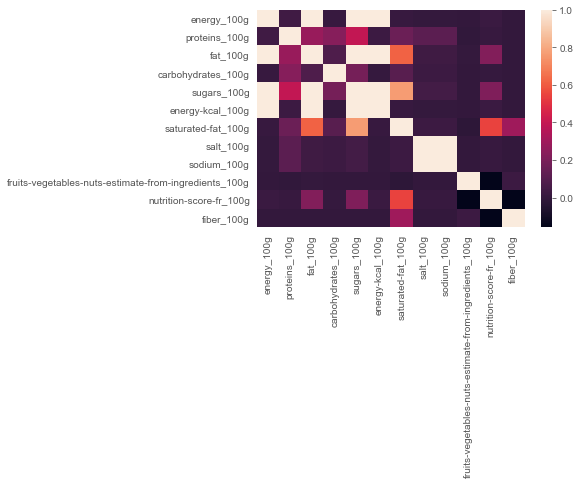

In [147]:
sns.heatmap(df_nutriments.corr())

<AxesSubplot:>

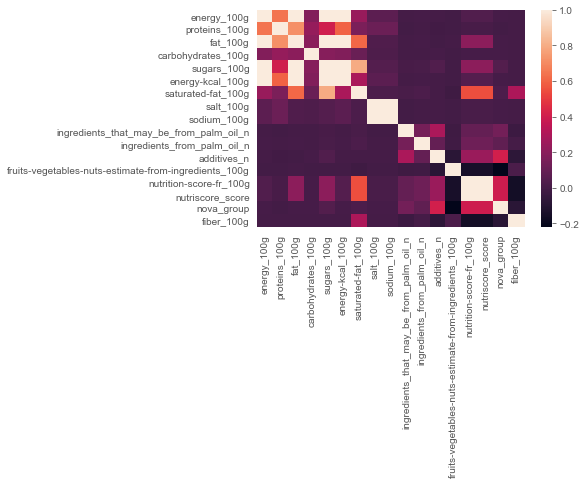

In [148]:
sns.heatmap(df_numeric.corr())

On remarque des corrélation trop importantes entre plusieurs catégories qui ne devrait pas y être cela es du au trop grand nombre de valeurs nulls, abberantes ou atypique dans ces catégories, il va donc falloir les remplacer.

In [149]:
df_nutriments.describe()

,energy_100g,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,energy-kcal_100g,saturated-fat_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g,fiber_100g
count,1.613606e+06,1.606823e+06,1.605563e+06,1.605158e+06,1.584398e+06,1.562641e+06,1.557026e+06,1.510889e+06,1.510886e+06,726840.000000,726017.000000,5.051350e+05
mean,4.130847e+36,8.810201e+00,6.851181e+07,2.882916e+01,6.311547e+07,6.961483e+07,5.107143e+00,2.231864e+00,8.927914e-01,8.466385,9.110962,1.942703e+41
std,5.247323e+39,6.224576e+01,8.681185e+10,6.258420e+02,7.944524e+10,8.029817e+10,1.653170e+01,1.204497e+02,4.818679e+01,36.386744,8.847891,1.380735e+44
min,0.000000e+00,-5.000000e+02,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-15.000000,-2.000000e+01
25%,4.180000e+02,1.300000e+00,8.000000e-01,3.500000e+00,6.000000e-01,1.000000e+02,1.000000e-01,8.000000e-02,3.200000e-02,0.000000,1.000000,0.000000e+00
50%,1.079000e+03,6.000000e+00,7.000000e+00,1.510000e+01,3.570000e+00,2.600000e+02,1.800000e+00,5.750000e-01,2.300000e-01,0.000000,10.000000,1.600000e+00
75%,1.674000e+03,1.250000e+01,2.117000e+01,5.300000e+01,1.750000e+01,4.000000e+02,7.080000e+00,1.400000e+00,5.600000e-01,0.333333,16.000000,3.600000e+00
max,6.665559e+42,7.300000e+04,1.100000e+14,7.629390e+05,1.000000e+14,1.000000e+14,1.670000e+04,7.500000e+04,3.000000e+04,13454.000000,40.000000,9.813275e+46


Je vais maintenant remplacer toutes les min et max abberants *(0, -1 ou 999999...)*, par des valeurs nulls.

In [150]:
df_numeric.columns

Index(['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'energy-kcal_100g', 'saturated-fat_100g', 'salt_100g',
       'sodium_100g', 'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_from_palm_oil_n', 'additives_n',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'nutrition-score-fr_100g', 'nutriscore_score', 'nova_group',
       'fiber_100g'],
      dtype='object')

In [151]:
df_numeric['ingredients_that_may_be_from_palm_oil_n']

1070582    0.0
724222     0.0
814768     0.0
718534     0.0
754458     0.0
          ... 
2009864    NaN
1517430    NaN
1315235    NaN
1986021    NaN
2009723    NaN
Name: ingredients_that_may_be_from_palm_oil_n, Length: 1384348, dtype: float64

In [152]:
#On fait une list de notre Dataframe numéric
numerical_columns = list(df_numeric)
#On supprime les nutriscores et les autres colonnes qui eux peuvent être négatifs
numerical_columns.remove('nutriscore_score')
numerical_columns.remove('nutrition-score-fr_100g')
numerical_columns.remove('ingredients_that_may_be_from_palm_oil_n')
numerical_columns.remove('ingredients_from_palm_oil_n')
numerical_columns.remove('nova_group')

In [153]:
numerical_columns

['energy_100g',
 'proteins_100g',
 'fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'energy-kcal_100g',
 'saturated-fat_100g',
 'salt_100g',
 'sodium_100g',
 'additives_n',
 'fruits-vegetables-nuts-estimate-from-ingredients_100g',
 'fiber_100g']

In [154]:
datas_cleaned.shape

(1384348, 39)

In [155]:
#On supprime les lignes dont toutes les numerical columns sont à 0 ou nulles
datas_cleaned = datas_cleaned.loc[~((datas_cleaned[numerical_columns]==0) | (datas_cleaned[numerical_columns].isnull())).all(axis=1)]

In [156]:
datas_cleaned.shape

(1316818, 39)

On a supprimer un peu moins de 70k lignes.

In [157]:
#On supprime les lignes contenant des valeurs négatives et des max aberrants
datas_cleaned = datas_cleaned[~(datas_cleaned[numerical_columns] < 0).any(axis=1)]
datas_cleaned = datas_cleaned[~(datas_cleaned[numerical_columns].isin([999999,9999999])).any(axis=1)]

In [158]:
datas_cleaned.shape

(1316800, 39)

On peut remarquer qu'on a pas supprimer beaucoup de valeurs, seulement 4, mais elles était indispensable a retirer.

Les colonnes `_100g` nous indiquent la quantité de nutriment pour 100 grammes de produit donc elle ne peuvent logiquement pas excéder 100. Nous allons donc supprimer les lignes dont au moins 1 des variables de nutriments est supérieur au seuil :

In [159]:
df_numeric.columns

Index(['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'energy-kcal_100g', 'saturated-fat_100g', 'salt_100g',
       'sodium_100g', 'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_from_palm_oil_n', 'additives_n',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'nutrition-score-fr_100g', 'nutriscore_score', 'nova_group',
       'fiber_100g'],
      dtype='object')

In [160]:
df_clear[['saturated-fat_100g', 'sugars_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g']].max()

saturated-fat_100g                                       1.670000e+04
sugars_100g                                              1.000000e+14
fruits-vegetables-nuts-estimate-from-ingredients_100g    1.345400e+04
dtype: float64

Il y a des valeurs aberrantes dans toutes ces colonnes. On les supprime, elle risquerait de trop fausser les résultats au vue de leur grandeur.

In [161]:
columns_100g = ['proteins_100g','fat_100g','carbohydrates_100g','sugars_100g','salt_100g',
                       'sodium_100g','saturated-fat_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g']
datas_cleaned = datas_cleaned[~(datas_cleaned[columns_100g] > 100).any(axis=1)]

In [162]:
datas_cleaned.shape

(1314290, 39)

On peut voir qu'on a supprimé environ 2k de lignes.

In [163]:
datas_cleaned[['fat_100g', 'saturated-fat_100g']] 

,fat_100g,saturated-fat_100g
1070582,10.900000,7.000000
724222,15.500000,1.300000
814768,3.200000,1.200000
718534,2.000000,0.600000
754458,25.000000,14.000000
...,...,...
2009864,4.500000,2.300000
1517430,NaN,NaN
1315235,1.200000,0.200000
1986021,18.928571,12.142857


On peut remarquer que les `satured-fat_100g` (`acides gras saturés`) ne peuvent pas être plus grand que les `fat_100g` (`matière grasse`) ainsi que les `sugar_100g` (`sucre`) qui ne peuvent pas être plus grand que les `carbohydrates_100g` (`glucides`). Nous allons donc voir si il y en a et les supprimer.

In [164]:
datas_cleaned[datas_cleaned['saturated-fat_100g'] > datas_cleaned['fat_100g']]

,code,created_datetime,url,last_modified_datetime,states_en,creator,pnns_groups_2,pnns_groups_1,countries_en,product_name,...,ingredients_text,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g,nutriscore_score,nutriscore_grade,image_ingredients_url,image_ingredients_small_url,nova_group,quantity,fiber_100g
744784,3103220009413,2012-05-08 19:32:41,http://world-en.openfoodfacts.org/product/3103...,2021-02-22 21:52:10,"To be completed,Nutrition facts completed,Ingr...",openfoodfacts-contributors,sweets,sugary snacks,France,Coccodri - Confiserie gélifiée fantaisie,...,"Sirop de glucose, sucre, dextrose, gélatine, a...",0.0,15.0,15.0,d,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,4.0,200 g,NaN
979734,3560070104413,2012-06-19 01:56:21,http://world-en.openfoodfacts.org/product/3560...,2020-05-16 08:44:42,"To be completed,Nutrition facts completed,Ingr...",elodiesebbaski,vegetables,fruits and vegetables,France,champignons de Paris émincés,...,"champignons, eau, sel, acidifiant : acide citr...",20.0,-1.0,-1.0,a,NaN,NaN,3.0,200g,1.6
556284,20072353,2012-06-23 21:19:55,http://world-en.openfoodfacts.org/product/2007...,2020-04-23 21:10:36,"To be checked,Complete,Nutrition facts complet...",openfoodfacts-contributors,sweetened beverages,beverages,"France,Switzerland,United States",Classic energy drink,...,"Carbonated water, invert sugar syrup, glucose-...",0.0,15.0,15.0,e,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,4.0,250 ml,0.1
821631,3259380112392,2012-07-08 18:14:13,http://world-en.openfoodfacts.org/product/3259...,2020-04-13 17:05:10,"To be checked,Complete,Nutrition facts complet...",javichu,legumes,cereals and potatoes,Spain,Brotes de judía mungo en conserva ecológicas &...,...,"Brotes de judía mungo*, agua, azúcar, vinagre ...",0.0,0.0,0.0,b,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,3.0,"330 g (neto), 175 g (escurrido), 370 ml",1.7
981078,3560070393763,2012-10-17 13:02:37,http://world-en.openfoodfacts.org/product/3560...,2021-06-09 10:23:06,"To be completed,Nutrition facts completed,Ingr...",andre,fish and seafood,fish meat eggs,"France,Switzerland",Crevettes Petites Roses,...,"Crevette 96% (Penaeidae), sel, acidifiants : a...",0.0,2.0,2.0,b,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,4.0,125 g,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206099,4050032365000,2021-11-10 12:45:48,http://world-en.openfoodfacts.org/product/4050...,2021-11-10 12:45:48,"To be completed,Nutrition facts completed,Ingr...",foodvisor,unknown,unknown,United States,24 cracker cuts extra sharp yellow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37860,00201,2021-11-11 17:23:59,http://world-en.openfoodfacts.org/product/0020...,2021-11-11 17:23:59,"To be completed,Nutrition facts completed,Ingr...",foodvisor,unknown,unknown,Ireland,Protein Powder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1468716,5949065012311,2021-11-13 14:35:53,http://world-en.openfoodfacts.org/product/5949...,2021-11-13 14:50:24,"To be completed,Nutrition facts completed,Ingr...",openfoodfacts-contributors,unknown,unknown,Romania,Pikans Mix,...,Din UE si din afara UE GREUTATEA NETA: 140g Pr...,0.0,-1.0,-1.0,a,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,140g,NaN
522636,09664265,2021-11-14 17:45:21,http://world-en.openfoodfacts.org/product/0966...,2021-11-14 17:50:46,"To be completed,Nutrition facts completed,Ingr...",inf,unknown,unknown,United States,Kirkland Organic Tortilla Chips,...,"organic corn, organic sunflower oil, and sea s...",0.0,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,2.0


On a 1082 lignes a supprimé, les acides gras saturés étant plus gras que la matière grasse, ce qui es impossible.

In [165]:
(datas_cleaned['sugars_100g'] > datas_cleaned['carbohydrates_100g']).sum()

1114

On a aussi 1114 lignes ou le sucre es plus grand que les glucides, ce qui es aussi impossible, on les supprimes.

In [166]:
datas_cleaned = datas_cleaned[~(datas_cleaned['saturated-fat_100g'] > datas_cleaned['fat_100g'])]
datas_cleaned = datas_cleaned[~(datas_cleaned['sugars_100g'] > datas_cleaned['carbohydrates_100g'])]
datas_cleaned.shape

(1312164, 39)

Enfin, les densité d'energie maximales pour 100g sont de 3700 kJ/100g. Nous allons donc supprimer toutes les lignes dont la variable `energy_100g` est supérieur à 3700 (ou 900 kcal/100g).

In [167]:
((datas_cleaned['energy_100g'] > 3700) | (datas_cleaned['energy-kcal_100g'] > 900)).sum()

10302

Nous avons 10k de lignes qui comporte des valeurs incohérente au niveau des valeurs énergétiques, on les supprime!

In [168]:
datas_cleaned = datas_cleaned[~(datas_cleaned['energy_100g'] > 3700) & ~(datas_cleaned['energy-kcal_100g'] > 900)]
datas_cleaned.shape

(1301862, 39)

In [169]:
df_numeric.columns

Index(['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'energy-kcal_100g', 'saturated-fat_100g', 'salt_100g',
       'sodium_100g', 'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_from_palm_oil_n', 'additives_n',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'nutrition-score-fr_100g', 'nutriscore_score', 'nova_group',
       'fiber_100g'],
      dtype='object')

On sait que l'addition de tous les nutriments ne peuvent pas écceder plus de 100 car les valeurs des produits sont tous sur 100g. Nous allons donc vérifier combien de produits ont leur total de nutriments qui dépassent les 100.

In [170]:
(datas_cleaned['proteins_100g'] + datas_cleaned['fat_100g'] + datas_cleaned['carbohydrates_100g'] + datas_cleaned['salt_100g'] 
              + datas_cleaned['sodium_100g'] > 100).sum()

17192

Il y a environ 17k de produits a supprimer.

In [171]:
datas_cleaned = datas_cleaned[~(datas_cleaned['proteins_100g'] + datas_cleaned['fat_100g'] + datas_cleaned['carbohydrates_100g'] + datas_cleaned['salt_100g'] 
              + datas_cleaned['sodium_100g'] > 100)]
datas_cleaned.shape

(1284670, 39)

In [172]:
datas_cleaned.isna().sum()

code                                                          0
created_datetime                                              0
url                                                           0
last_modified_datetime                                        0
states_en                                                     0
creator                                                       2
pnns_groups_2                                                 0
pnns_groups_1                                                 0
countries_en                                                  0
product_name                                               1752
energy_100g                                               34471
proteins_100g                                             35311
fat_100g                                                  36721
carbohydrates_100g                                        36817
sugars_100g                                               60402
energy-kcal_100g                        

Après avoir traité les outliers, les valeurs abberantes et atypiques, supprimer les lignes avec des valeurs incohérentes de touts nos colonnes nutriments, il nous en reste plus qu'une seule qui n'a pas pu être faite : `additives_n`

In [173]:
sigma_features = ['additives_n']
#On initialise l'écart-type et la médiane
sigma = [0 for _ in range(len(sigma_features))]
median = [0 for _ in range(len(sigma_features))]
#Puis on complètes les valeurs avec le dataset sans les valeurs nulles
for i in range(len(sigma_features)):
  median[i] = datas_cleaned[pd.notnull(datas_cleaned[sigma_features[i]])][sigma_features[i]].median()
  serie = datas_cleaned[pd.notnull(datas_cleaned[sigma_features[i]])][sigma_features[i]]
  serie = serie.sort_values()
  sigma[i] = np.std(serie[:-25])

On va maintenant repérer les outliers qui diffèrent de la valeur médiane de plus de 5 fois l'écart-type.

In [174]:
for i in range(len(sigma_features)):
    col = sigma_features[i]
    threshold = (median[i] + 5*sigma[i])
    print('{:30}: suppression de la ligne si valeur > {}'.format(col, round(threshold,3)))
    mask = datas_cleaned[col] > threshold
    datas_cleaned = datas_cleaned.drop(datas_cleaned[mask].index)
    

additives_n                   : suppression de la ligne si valeur > 15.561


In [175]:
datas_cleaned.shape

(1281859, 39)

On a supprimer environ 3k de lignes.

In [176]:
datas_cleaned.describe()

,energy_100g,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,energy-kcal_100g,saturated-fat_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g,nutriscore_score,nova_group,fiber_100g
count,1.247487e+06,1.246643e+06,1.245233e+06,1.245136e+06,1.221564e+06,1.202212e+06,1.199272e+06,1.155327e+06,1.155324e+06,576613.000000,576613.000000,576613.000000,576303.000000,572335.000000,572331.000000,511571.000000,4.191380e+05
mean,1.118476e+03,8.413234e+00,1.293932e+01,2.899383e+01,1.351986e+01,2.681010e+02,4.893855e+00,1.143510e+00,4.574589e-01,0.074601,0.022672,2.037970,8.721183,9.001258,9.001183,3.467767,2.341299e+41
std,7.644448e+02,9.615233e+00,1.613963e+01,2.775301e+01,1.937341e+01,1.828601e+02,7.344791e+00,2.772049e+00,1.109876e+00,0.313617,0.150881,2.665427,22.031826,8.826802,8.826782,0.931447,1.515777e+44
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000,1.000000,0.000000e+00
25%,4.270000e+02,1.500000e+00,8.000000e-01,4.400000e+00,8.900000e-01,1.030000e+02,1.000000e-01,9.652000e-02,3.860800e-02,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000e+00
50%,1.075000e+03,6.000000e+00,6.800000e+00,1.700000e+01,4.000000e+00,2.590000e+02,1.800000e+00,5.800000e-01,2.320000e-01,0.000000,0.000000,1.000000,0.000000,10.000000,10.000000,4.000000,1.700000e+00
75%,1.657000e+03,1.200000e+01,2.040000e+01,5.360000e+01,1.900000e+01,3.970000e+02,6.820000e+00,1.345000e+00,5.380000e-01,0.000000,0.000000,3.000000,2.500000,16.000000,16.000000,4.000000,3.700000e+00
max,3.700000e+03,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,9.000000e+02,1.000000e+02,1.000000e+02,4.998720e+01,6.000000,3.000000,15.000000,100.000000,40.000000,40.000000,4.000000,9.813275e+46


Après ces quelques opérations de nettoyage, les valeurs médianes, d'écarts-type, de minimum et maximum sont plus cohérentes. Nous allons pouvoir exploiter ces données pour estimer les valeurs manquantes.

## Estimation et remplacement des valeurs manquantes

Nous allons déjà regarder la **distribution de ces variables et définir si elles suivent une loi normale**

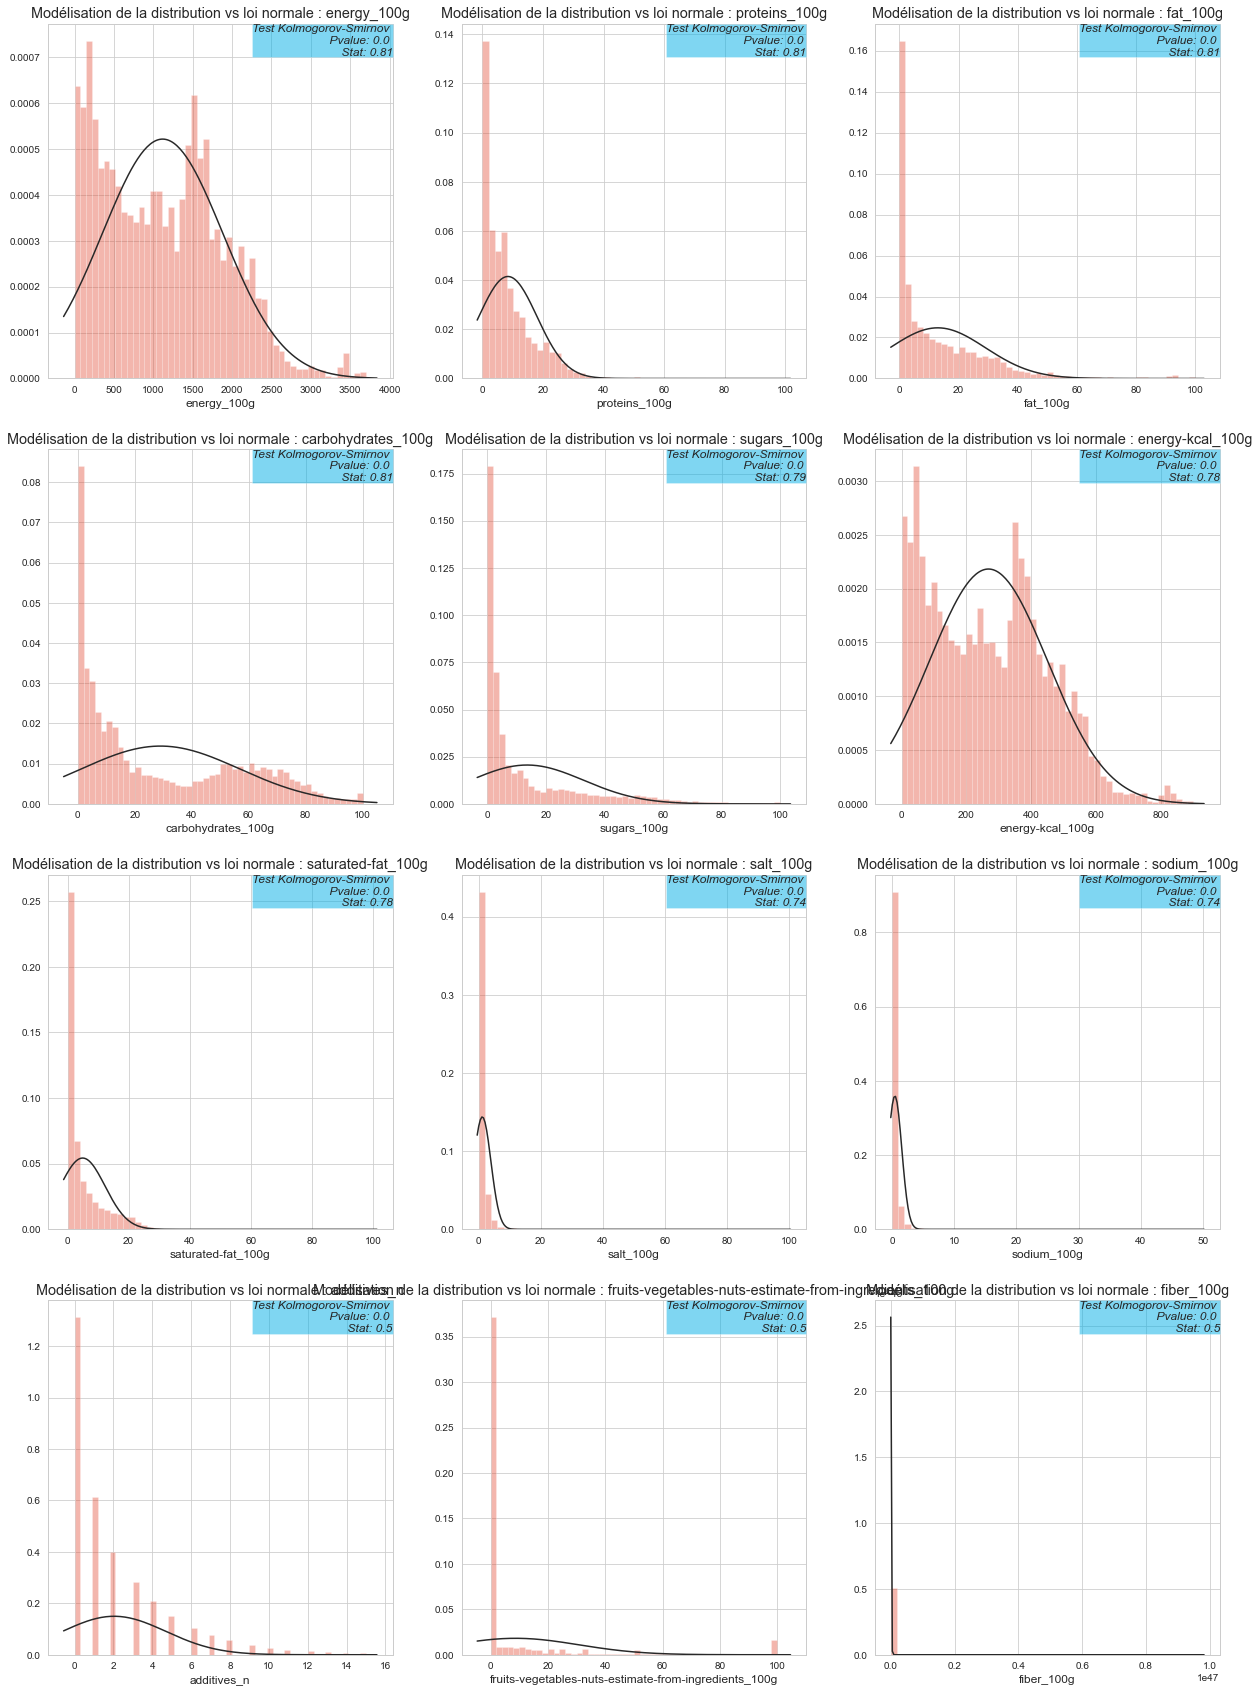

In [177]:
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,30))

sub = 0
for i in range(len(numerical_columns)):
    fig.add_subplot(4,3,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = numerical_columns[i]
    kstest = stats.kstest(datas_cleaned[colonne].notnull(),'norm')
    ax = sns.distplot(datas_cleaned[colonne], fit=stats.norm, kde=False)
    ax.set_title("Modélisation de la distribution vs loi normale : {}".format(colonne))
    ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    sub += 1
plt.show()

En se basant sur les projections obtenus et les résultats des tests de Kolmogorov-Smirnov (Pvalue < au niveau de test de 5%) **on rejette donc la normalité de distribution de ces variables**. Il serait donc faux de remplacer les valeurs manquantes par la moyenne.

Pour confirmer cette approche, regardons à présent quelque unes de ces distributions en fonction de la catégorie `pnns_groups_1` :

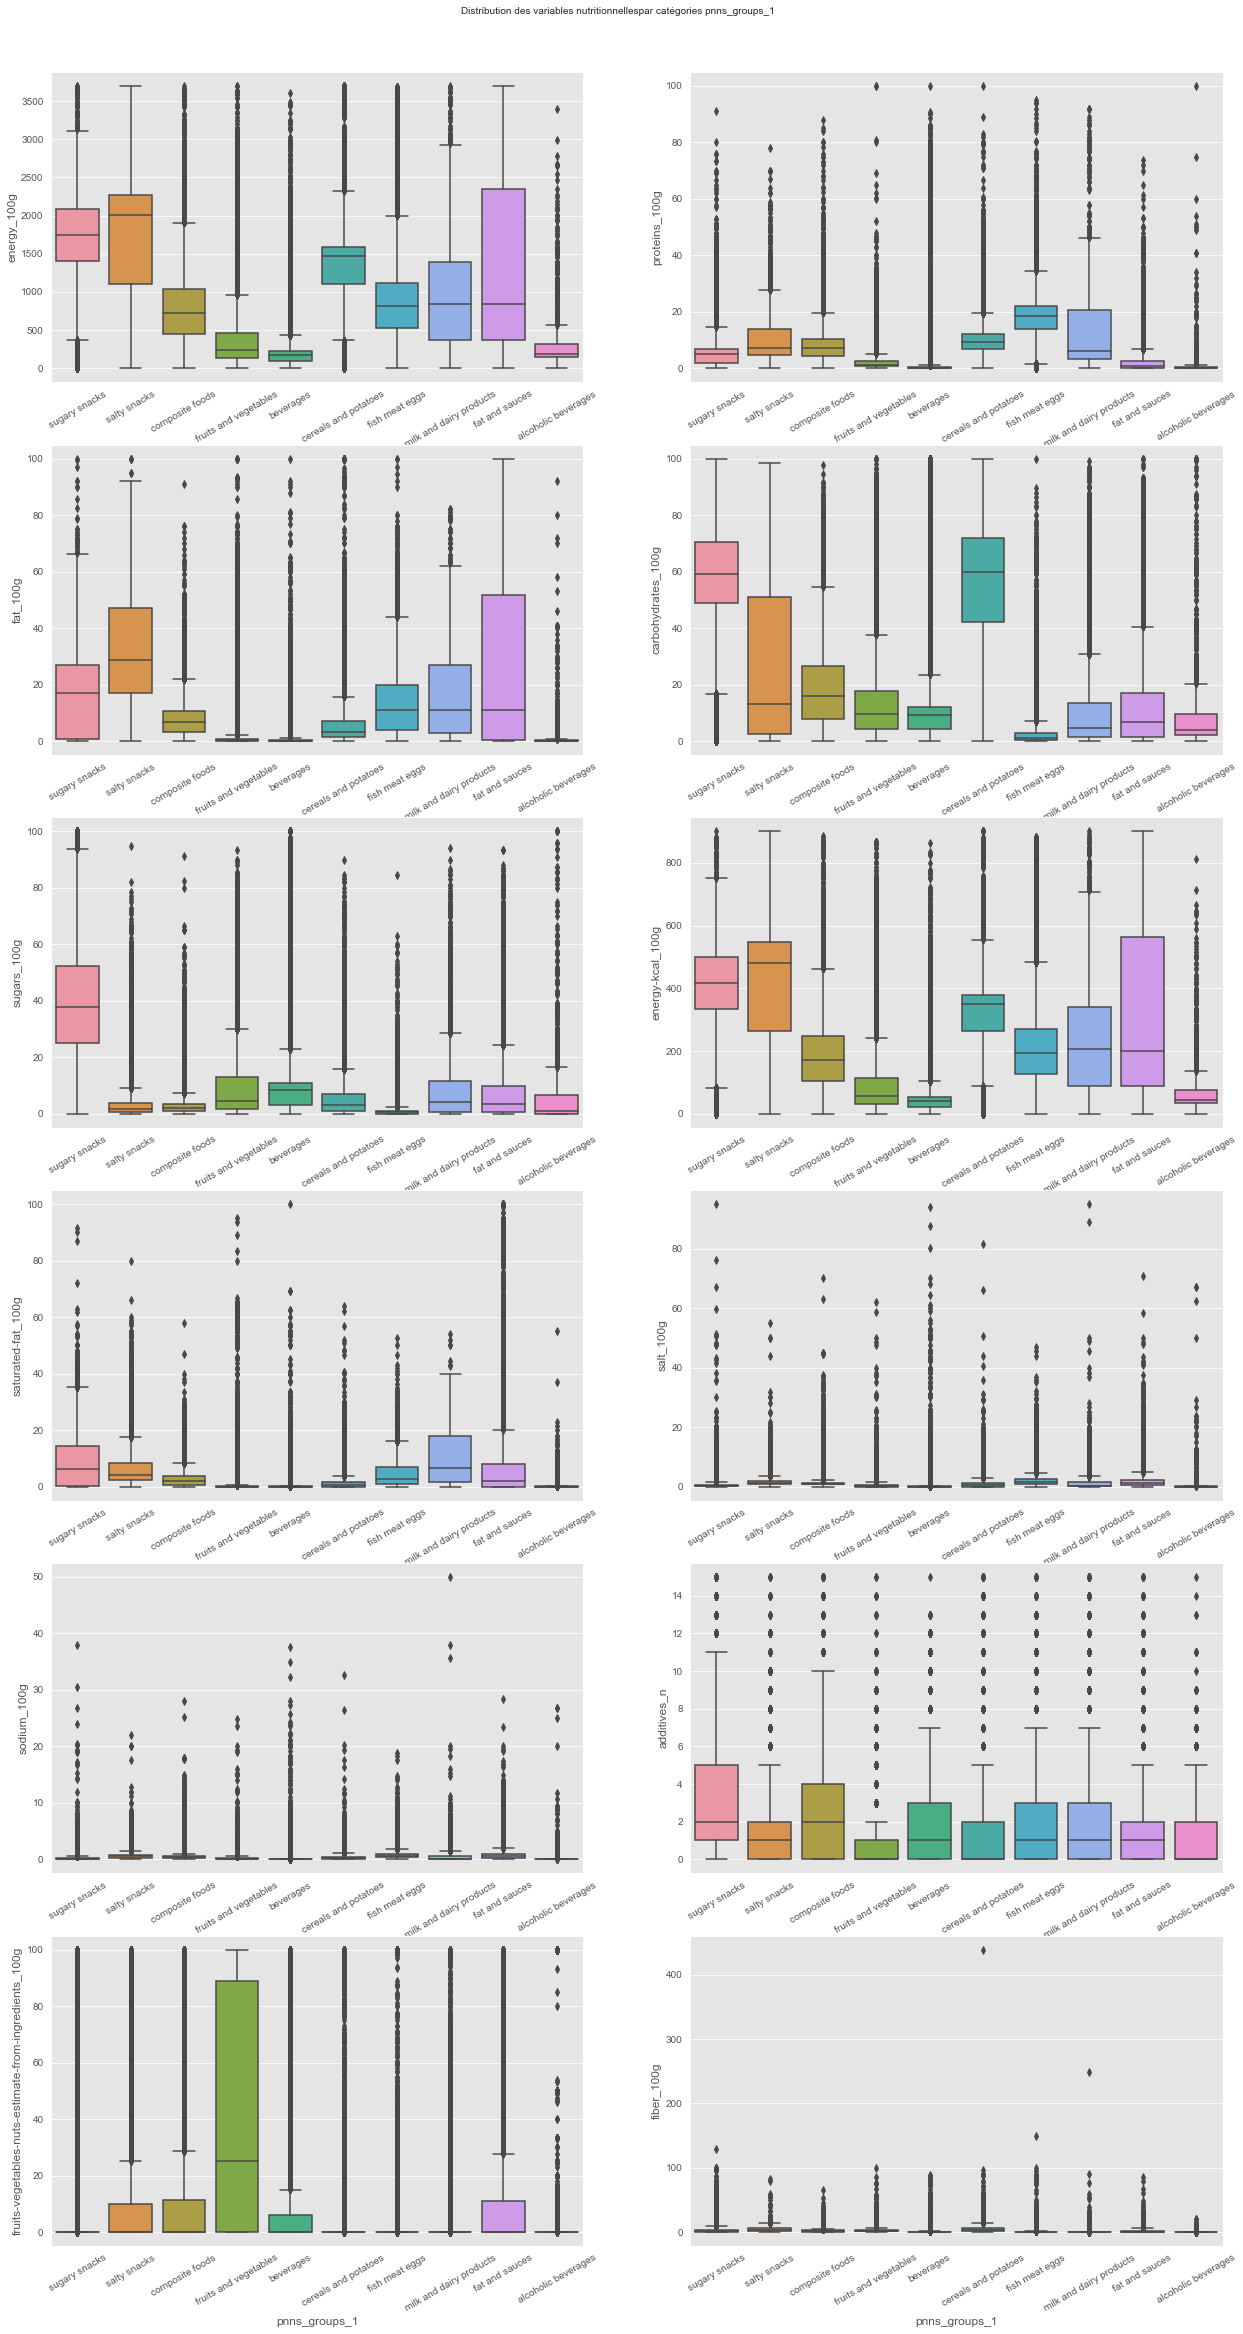

In [178]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(21,40))

sub = 0
for i in range(len(numerical_columns)):
    fig.add_subplot(6,2,i+1)
    colonne = numerical_columns[i]
    ax = sns.boxplot(x="pnns_groups_1", y=colonne, data=datas_cleaned[datas_cleaned["pnns_groups_1"]!="unknown"])
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    sub += 1

fig.text(0.5, 0.90, r"Distribution des variables nutritionnelles" "par catégories pnns_groups_1", ha="center")
plt.show()

A présent si l'on regarde la distribution de quelques unes de ces mêmes variables sur la catégorie `pnns_groups_2` :

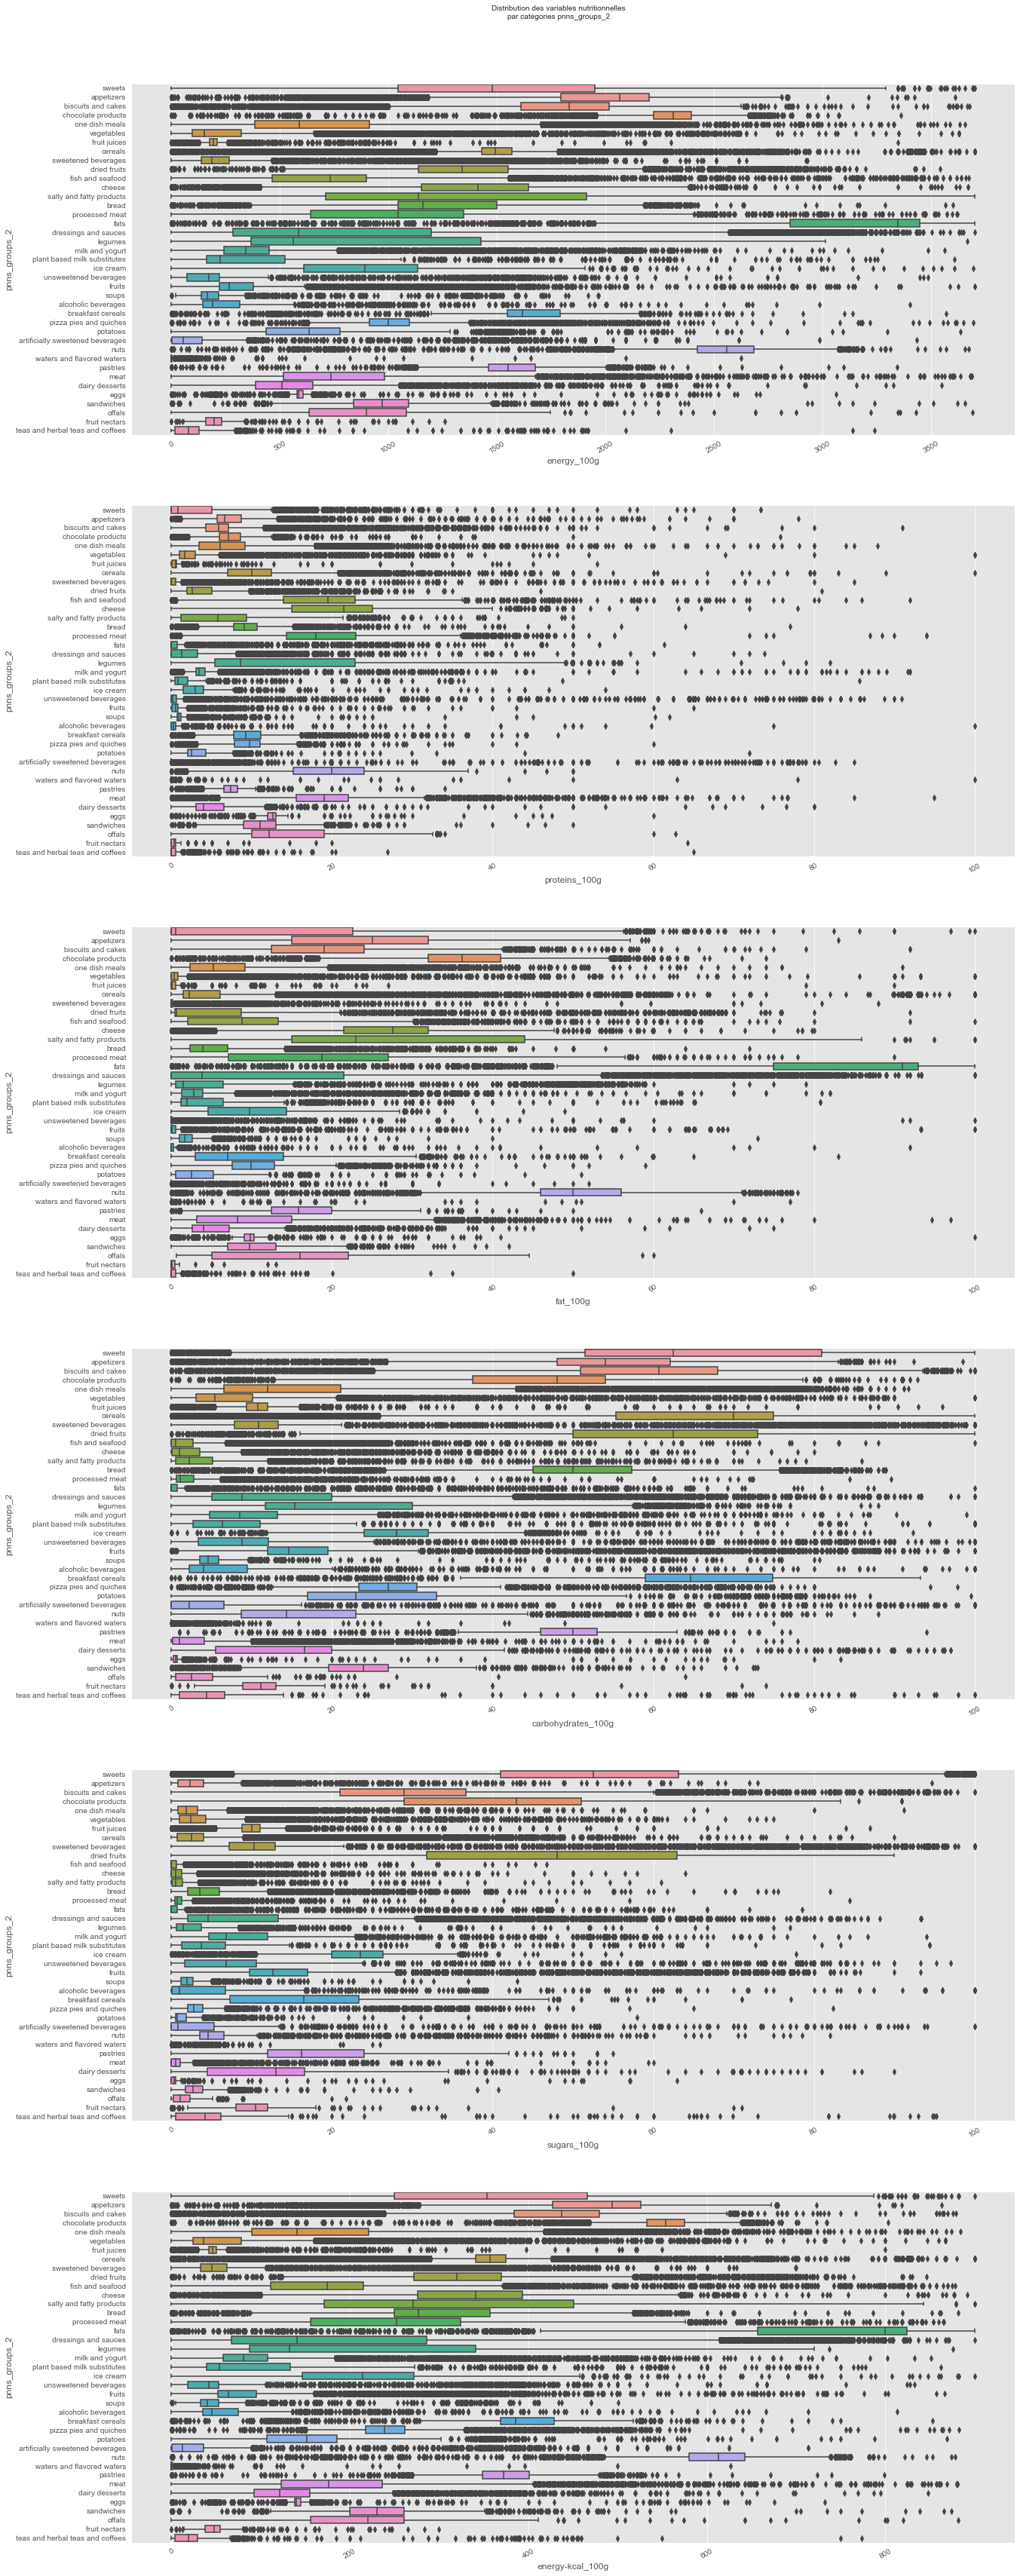

In [179]:


plt.style.use('ggplot')
fig = plt.figure(figsize=(21,60))

sub = 0
for i in range(len(numerical_columns[:6])):
    fig.add_subplot(6,1,i+1)
    colonne = numerical_columns[i]
    ax = sns.boxplot(y="pnns_groups_2", x=colonne, data=datas_cleaned[datas_cleaned["pnns_groups_2"]!="unknown"])
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    sub += 1

fig.text(0.5, 0.90, r"Distribution des variables nutritionnelles" "\n" "par catégories pnns_groups_2", ha="center")
plt.show()



In [180]:
datas_cleaned[numerical_columns].isnull().sum()

energy_100g                                               34372
proteins_100g                                             35216
fat_100g                                                  36626
carbohydrates_100g                                        36723
sugars_100g                                               60295
energy-kcal_100g                                          79647
saturated-fat_100g                                        82587
salt_100g                                                126532
sodium_100g                                              126535
additives_n                                              705246
fruits-vegetables-nuts-estimate-from-ingredients_100g    705556
fiber_100g                                               862721
dtype: int64

Pour ces valeurs nulles ci-dessus, la variable `additives_n` est très peu renseignées, nous allons donc la supprimer.     
`fiber_100g` est aussi mal renseigné mais nous en aurons besoin pour la suite. Nous allons donc compléter les valeurs nulles par la **médiane de la catégorie** `pnns_groups_2`.

In [181]:
#On supprime la variable redondante energie
datas_cleaned.drop(['energy-kcal_100g'], axis=1, inplace=True)

In [183]:
numerical_columns.remove('energy-kcal_100g')

In [182]:
# On complète les variables restantes avec la médiane du groupe pnns 2
for col in ['carbohydrates_100g','sodium_100g','fat_100g','fiber_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g'
            , 'energy_100g','proteins_100g','saturated-fat_100g','sugars_100g','salt_100g', 'additives_n']:
    datas_cleaned[col] = datas_cleaned.groupby('pnns_groups_2')[col].transform(lambda x: x.fillna(x.median()))

In [136]:
datas_cleaned['fiber_100g']

1070582    1.0
724222     3.0
814768     1.6
718534     1.7
754458     5.5
          ... 
2009864    2.2
1517430    2.2
1315235    2.0
1986021    2.2
2009723    2.8
Name: fiber_100g, Length: 1281859, dtype: float64

In [184]:
datas_cleaned[numerical_columns].isnull().sum()

energy_100g                                              0
proteins_100g                                            0
fat_100g                                                 0
carbohydrates_100g                                       0
sugars_100g                                              0
saturated-fat_100g                                       0
salt_100g                                                0
sodium_100g                                              0
additives_n                                              0
fruits-vegetables-nuts-estimate-from-ingredients_100g    0
fiber_100g                                               0
dtype: int64

Les valeurs manquantes étant à présent toutes complétées pour ces variables numériques, nous allons vérifier que les distributions n'ont pas changées :

ValueError: num must be 1 <= num <= 9, not 10

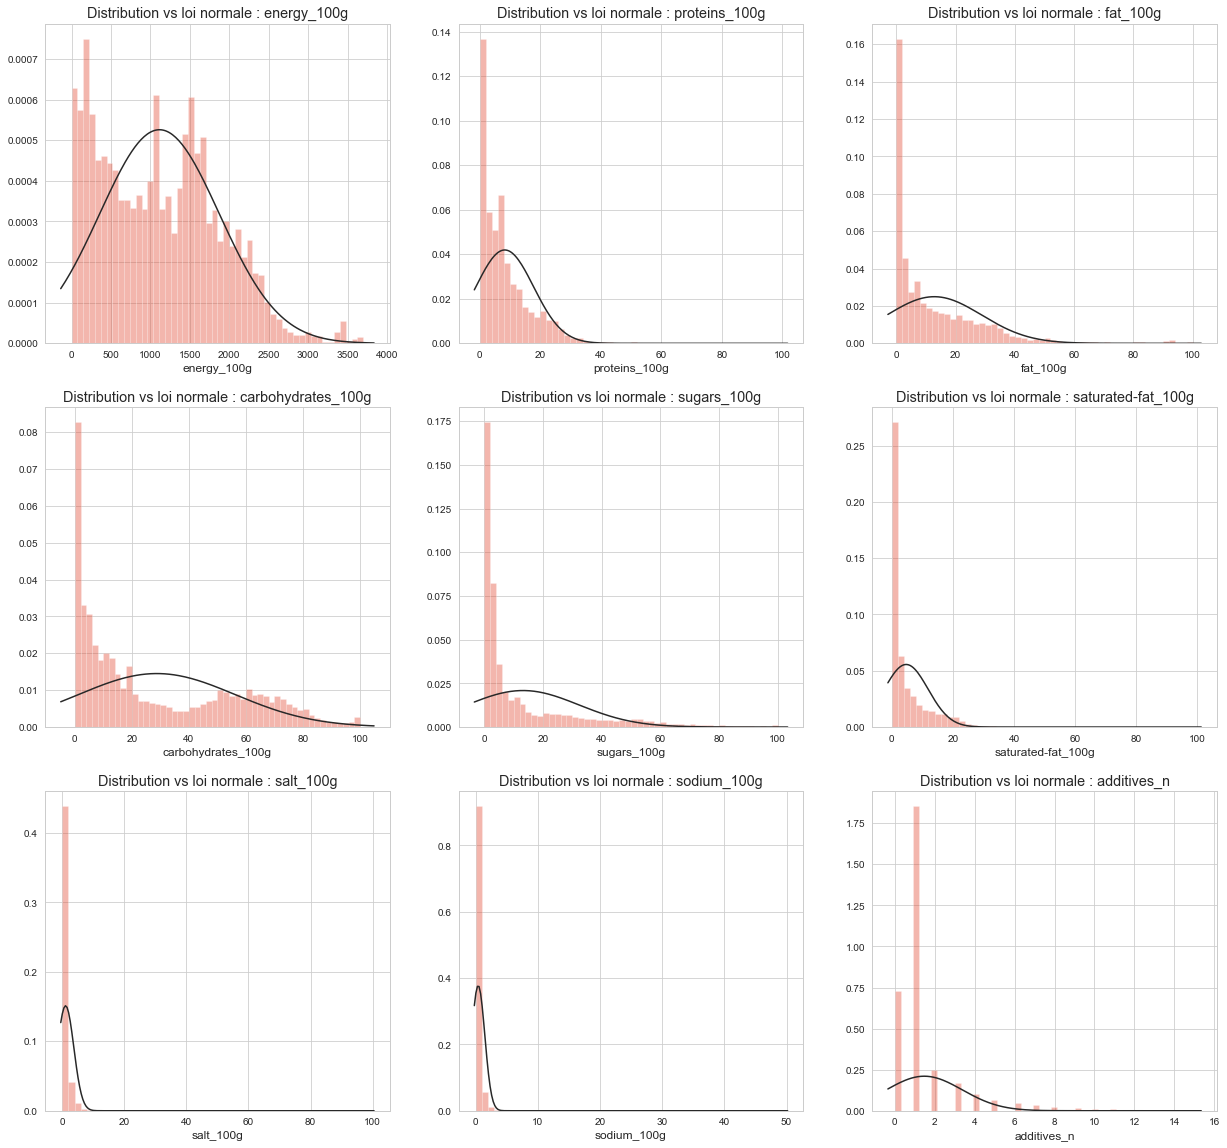

In [185]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,20))

sub = 0
for i in range(len(numerical_columns)):
    fig.add_subplot(3,3,i+1)
    colonne = numerical_columns[i]
    kstest = stats.kstest(datas_cleaned[colonne].notnull(),'norm')
    ax = sns.distplot(datas_cleaned[colonne], fit=stats.norm, kde=False)
    ax.set_title("Distribution vs loi normale : {}".format(colonne))
    sub += 1
plt.show()

Les variables semble conforme aux variables d'origine, nous allons à présent **supprimer les dernières variables non pertinentes**, peu renseignées ou inutiles dans nos futurs modèles :

In [186]:
datas_cleaned.isnull().sum().sort_values(ascending=False)

quantity                                                 914026
image_ingredients_small_url                              772179
image_ingredients_url                                    772179
nova_group                                               770288
nutriscore_grade                                         709528
nutriscore_score                                         709528
nutrition-score-fr_100g                                  709524
ingredients_text                                         705247
ingredients_that_may_be_from_palm_oil_n                  705246
ingredients_from_palm_oil_n                              705246
image_nutrition_url                                      492220
image_nutrition_small_url                                492220
brands                                                   491761
image_small_url                                          301802
image_url                                                301802
product_name                            

In [188]:
deleted_features = ['brands','nova_group','image_ingredients_small_url',
                    'image_ingredients_url','ingredients_text','ingredients_from_palm_oil_n',
                    'ingredients_that_may_be_from_palm_oil_n','image_nutrition_url','image_nutrition_small_url',
                    'image_url','image_small_url', 'nutrition-score-fr_100g','quantity']
datas_cleaned.drop(deleted_features, axis=1, inplace=True)

In [189]:
datas_cleaned.isnull().sum().sort_values(ascending=False)

nutriscore_grade                                         709528
nutriscore_score                                         709528
product_name                                               1750
creator                                                       2
code                                                          0
sugars_100g                                                   0
fruits-vegetables-nuts-estimate-from-ingredients_100g         0
additives_n                                                   0
categories_en                                                 0
main_category_en                                              0
sodium_100g                                                   0
salt_100g                                                     0
saturated-fat_100g                                            0
fat_100g                                                      0
carbohydrates_100g                                            0
created_datetime                        

In [190]:
datas_cleaned.shape

(1281859, 25)

Voici notre jeu de données finale, hormis les nutri-score manquants il es a présent nettoyer et complété au maximum, il ne possède plus de valeurs manquantes. Nous avons aussi supprimer toutes les lignes et colonnes inutiles, au final, il ne comporte plus que 1 281 859 lignes et 25 colonnes.

## Calcul des Nutri-score manquants 
Une des variables primoridale de ce jeu de données est le Nutriscore. Or, cette variable compte beaucoup de manquants. 
Afin de calculer ce nutriscore, nous avons besoin de plusieurs autres variables.

Le score prend en comptepour 100g de produit, la teneur :
- En nutriments et aliments à favoriser (fibres, protéines, fruits et légumes),
- En nutriments à limiter (énergie, acide gras saturés, sucres, sel).

Après calcul, le score obtenu par un produit permet de lui attribuer une lettre et une couleur.
Nous allons donc **isoler les variables nécessaires au calcul du Nutriscore et vérifier leur taux de remplissage** :

In [194]:
nutriscore_features = ['pnns_groups_1', 'pnns_groups_2', 'nutriscore_grade', 'nutriscore_score',
                       'energy_100g','sugars_100g','saturated-fat_100g','sodium_100g', 'fiber_100g', 'proteins_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g']
datas_cleaned[nutriscore_features].sample(10)

,pnns_groups_1,pnns_groups_2,nutriscore_grade,nutriscore_score,energy_100g,sugars_100g,saturated-fat_100g,sodium_100g,fiber_100g,proteins_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
708187,unknown,unknown,NaN,NaN,1439.0,9.40,1.10,0.080,2.2,24.30,0.0
1512522,unknown,unknown,NaN,NaN,1460.0,0.00,0.00,0.000,1.6,8.20,0.0
1407359,unknown,unknown,NaN,NaN,75.0,4.50,0.00,0.000,0.0,0.00,0.7
2010379,alcoholic beverages,alcoholic beverages,NaN,NaN,148.0,7.40,0.10,0.004,0.0,0.10,0.0
1240408,milk and dairy products,milk and yogurt,b,2.0,385.0,11.90,1.80,0.048,0.0,3.30,0.0
77756,beverages,artificially sweetened beverages,NaN,NaN,1904.0,0.00,0.00,0.000,0.0,0.00,0.0
768886,salty snacks,appetizers,c,10.0,1655.0,1.70,0.60,1.600,3.8,11.00,0.0
2007501,unknown,unknown,NaN,NaN,180.0,1.20,0.20,0.660,2.2,1.00,0.0
313651,unknown,unknown,NaN,NaN,1280.0,21.00,7.70,0.320,2.2,5.40,0.0
47180,cereals and potatoes,cereals,d,13.0,1766.0,44.44,4.44,0.000,8.9,8.89,25.0


A présent, nous allons définir la **fonction de calcul du Nutriscore** et l'appliquer à notre dataset :

In [198]:
def calc_globalscore(row):
    #Energy
    if row["energy_100g"] <= 335:
        a = 0
    elif ((row["energy_100g"] > 335) & (row["energy_100g"] <= 1675)):
        a = 5
    else:
        a = 10 
    #Sugar
    if row["sugars_100g"] <= 4.5:
        b = 0
    elif ((row["sugars_100g"] > 4.5) & (row["sugars_100g"] <= 22.5)):
        b = 5
    else:
        b = 10
    #saturated-fat
    if row["saturated-fat_100g"] <= 1:
        c = 0
    elif ((row["saturated-fat_100g"] > 1) & (row["saturated-fat_100g"] <= 5)):
        c = 5
    else:
        c = 10
    #sodium
    if (row["sodium_100g"]/1000) <= 90:
        d = 0
    elif (((row["sodium_100g"]/1000) > 90) & ((row["sodium_100g"]/1000) <= 450)):
        d = 5
    else:
        d = 10
    #fruits-vegetables-rate
    if row["fruits-vegetables-nuts-estimate-from-ingredients_100g"] <= 40:
        e = 0
    elif ((row["fruits-vegetables-nuts-estimate-from-ingredients_100g"] > 40) & (row["fruits-vegetables-nuts-estimate-from-ingredients_100g"] <= 80)):
        e = -2
    else:
        e = -5
    #fiber
    if row["fiber_100g"] <= 0.7:
        f = 0
    elif ((row["fiber_100g"] > 0.7) & (row["fiber_100g"] <= 3.5)):
        f = -2
    else:
        f = -5
    #proteins
    if row["proteins_100g"] <= 1.6:
        g = 0
    elif ((row["proteins_100g"] > 1.6) & (row["proteins_100g"] <= 8)):
        g = -2
    else:
        g = -5
    
    #Global_score
    global_score = a+b+c+d+e+f+g
    
    return global_score

On calcul d'abord le score global avec notre fonction ci dessus puis grâce a celui ci on détermine notre nutri-score avec la fonction ci dessous.

In [199]:
#Nutriscore
def calc_nutriscore(row):
    if row["calc_global_score"] < 0 :
        nutriscore = "a"
    elif ((row["calc_global_score"] >= 0) & (row["calc_global_score"] < 5)) :
        nutriscore = "b"
    elif ((row["calc_global_score"] >= 5) & (row["calc_global_score"] < 10)) :
        nutriscore = "c"
    elif ((row["calc_global_score"] >= 10) & (row["calc_global_score"] < 20)) :
        nutriscore = "d"
    else:
        nutriscore = "e"
        
    return nutriscore

On applique ensuite nos fonctions a notre dataset en créant nos 2 nouvelles variables afin qu'il nous estime nos Nutri-score.

In [200]:
datas_cleaned['calc_global_score'] = datas_cleaned.apply(lambda row: calc_globalscore(row),axis=1)
datas_cleaned['calc_nutriscore'] = datas_cleaned.apply(lambda row: calc_nutriscore(row),axis=1)

In [201]:
#On les ajoutent aussi a notre liste
nutriscore_features.append('calc_global_score')
nutriscore_features.append('calc_nutriscore')

In [202]:
datas_cleaned[nutriscore_features].sample(10)

,pnns_groups_1,pnns_groups_2,nutriscore_grade,nutriscore_score,energy_100g,sugars_100g,saturated-fat_100g,sodium_100g,fiber_100g,proteins_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,calc_global_score,calc_nutriscore
1351971,unknown,unknown,e,26.0,2280.0,59.00,23.000000,0.072,2.2,3.70,0.0,26,e
1253972,unknown,unknown,NaN,NaN,757.0,3.90,1.785714,0.236,2.2,6.00,0.0,6,c
342257,unknown,unknown,NaN,NaN,891.0,13.70,4.400000,0.440,2.2,11.50,0.0,8,c
273759,cereals and potatoes,cereals,a,-6.0,1494.0,3.57,0.000000,0.000,8.9,10.71,0.0,-5,a
2007900,unknown,unknown,NaN,NaN,1210.0,25.80,0.800000,4.490,6.6,7.10,0.0,8,c
1758739,unknown,unknown,d,13.0,623.0,0.00,2.500000,0.920,2.2,1.40,0.0,8,c
1466439,unknown,unknown,NaN,NaN,577.0,0.20,1.400000,0.160,2.2,14.00,0.0,3,b
1205110,fruits and vegetables,vegetables,a,-3.0,109.0,0.50,0.100000,0.228,2.2,1.50,0.0,-2,a
637343,milk and dairy products,cheese,d,15.0,1565.0,0.50,22.000000,0.560,0.0,22.00,0.0,10,d
1024327,milk and dairy products,milk and yogurt,c,4.0,318.0,0.60,4.200000,0.040,0.0,0.60,0.0,5,c


In [208]:
datas_cleaned[['product_name', 'pnns_groups_2', 'nutriscore_score', 'calc_global_score','nutriscore_grade', 'calc_nutriscore']].sample(10)

,product_name,pnns_groups_2,nutriscore_score,calc_global_score,nutriscore_grade,calc_nutriscore
368083,Dicks perky pickles jars,unknown,10.0,13,c,d
1107576,Terrine au confit d'oignon de Roscoff,unknown,NaN,8,NaN,c
659357,La crème forestière,unknown,NaN,8,NaN,c
1180528,m&m's chocolate,sweets,23.0,26,e,e
1431305,POP CBD INFUSION ANTI STRESS BIO,unknown,NaN,-2,NaN,a
1855360,Pate de Olivas negras con cebolla,unknown,5.0,8,c,c
1870226,Agua de coco,unknown,NaN,-2,NaN,a
1900277,Mini jamon serrano,processed meat,14.0,5,d,c
996670,Biscuit goût chocolat,unknown,NaN,8,NaN,c
533512,Assil,unknown,NaN,3,NaN,b


Ici nous avons l'estimation de nos nutri-score manquants, `calc_global_score` qui correspond a notre colonne `nutriscore_score` ainsi que `nutriscore_score``nutriscore_grade` qui correspond a notre colonne `calc_nutriscore`.

In [209]:
df_scores = datas_cleaned[['nutriscore_grade', 'nutriscore_score', 'calc_nutriscore', 'calc_global_score']][datas_cleaned['nutriscore_grade'].isnull()==False]

from sklearn.metrics import accuracy_score

accuracy_nutrigrade = accuracy_score(df_scores['nutriscore_grade'].values, df_scores['calc_nutriscore'].values)
print("L'accuracy_score sur les Nutrigrades calculés est de : {:.2f} %.".format(accuracy_nutrigrade*100))

L'accuracy_score sur les Nutrigrades calculés est de : 48.97 %.
